--- Î∂ÑÏÑù Í≤∞Í≥º ---
Í∞ÄÏ†ï Î≥ÄÍ≤Ω ÌõÑ ÏõîÍ∞Ñ ÌèâÍ∑† Ìò∏Ï∂ú ÎåÄÍ∏∞ÏãúÍ∞Ñ: 6.42Î∂Ñ
ÏõîÍ∞Ñ ÌèâÍ∑† ÌîΩÏóÖ ÎåÄÍ∏∞ÏãúÍ∞Ñ: 35.00Î∂Ñ
Ï¥ù 30Í∞úÏùò ÌååÏùºÏùÑ Ï∞æÏïòÏäµÎãàÎã§.
1. 'monthly_status_counts.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.
2. 'monthly_avg_waiting_time_trend.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.
3. 'monthly_demand_and_service_trends.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


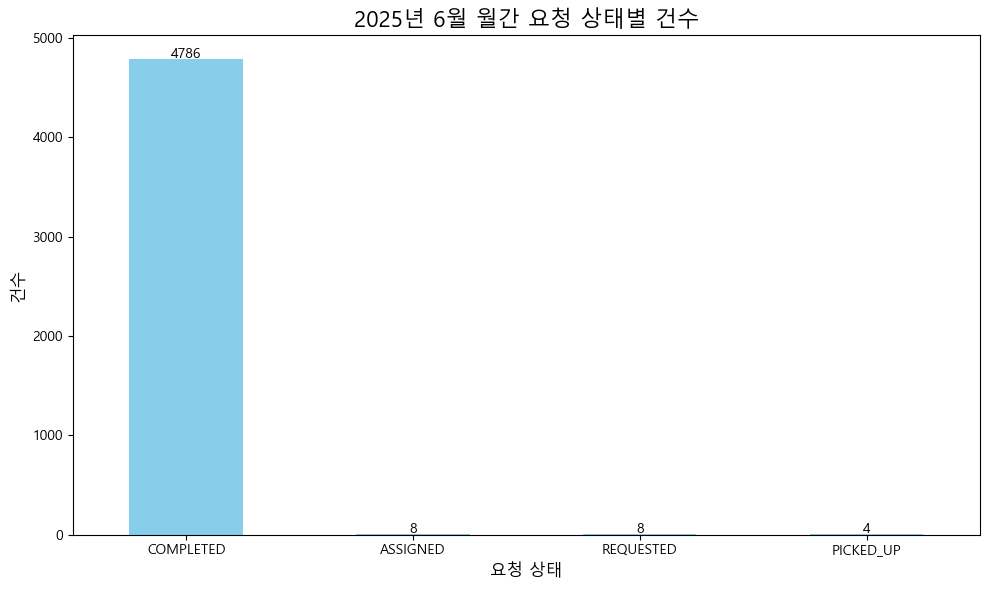

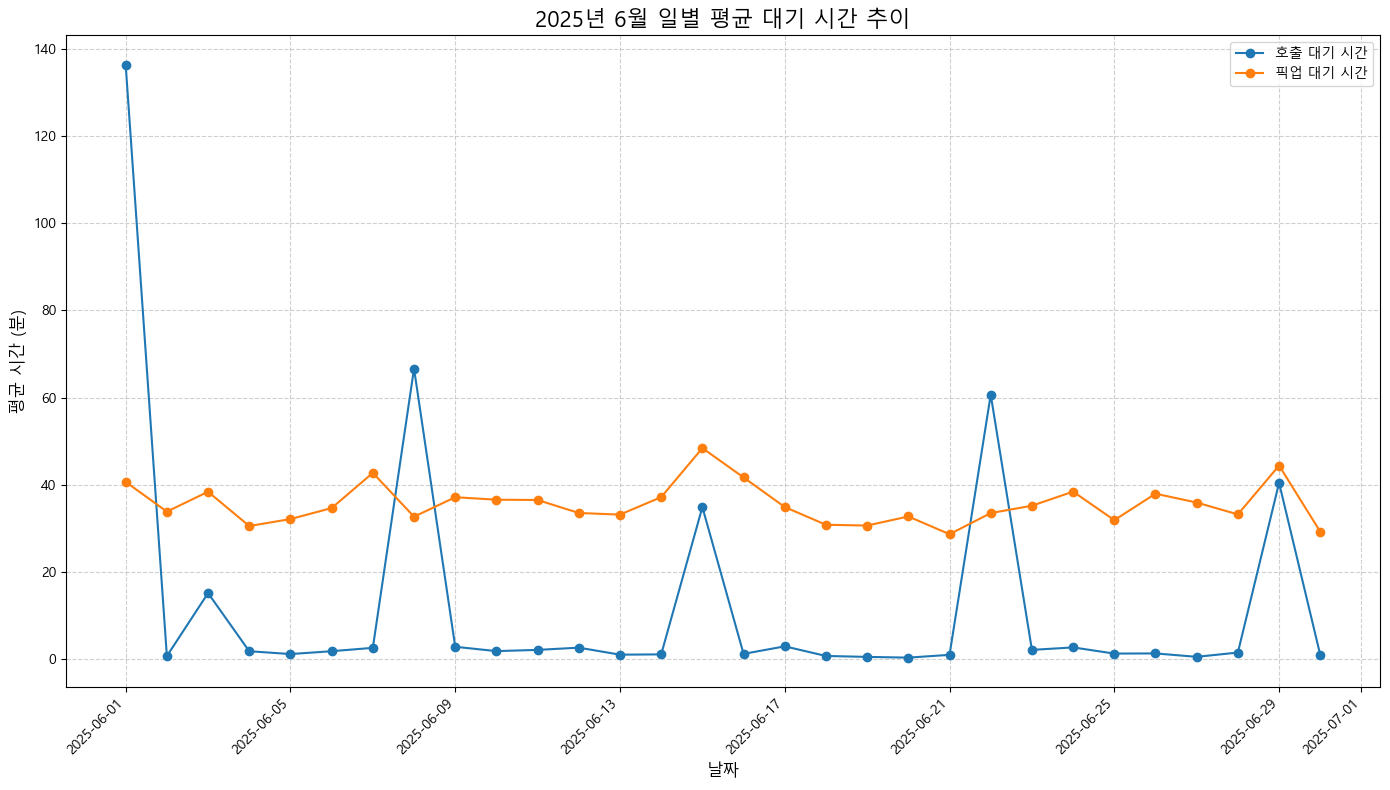

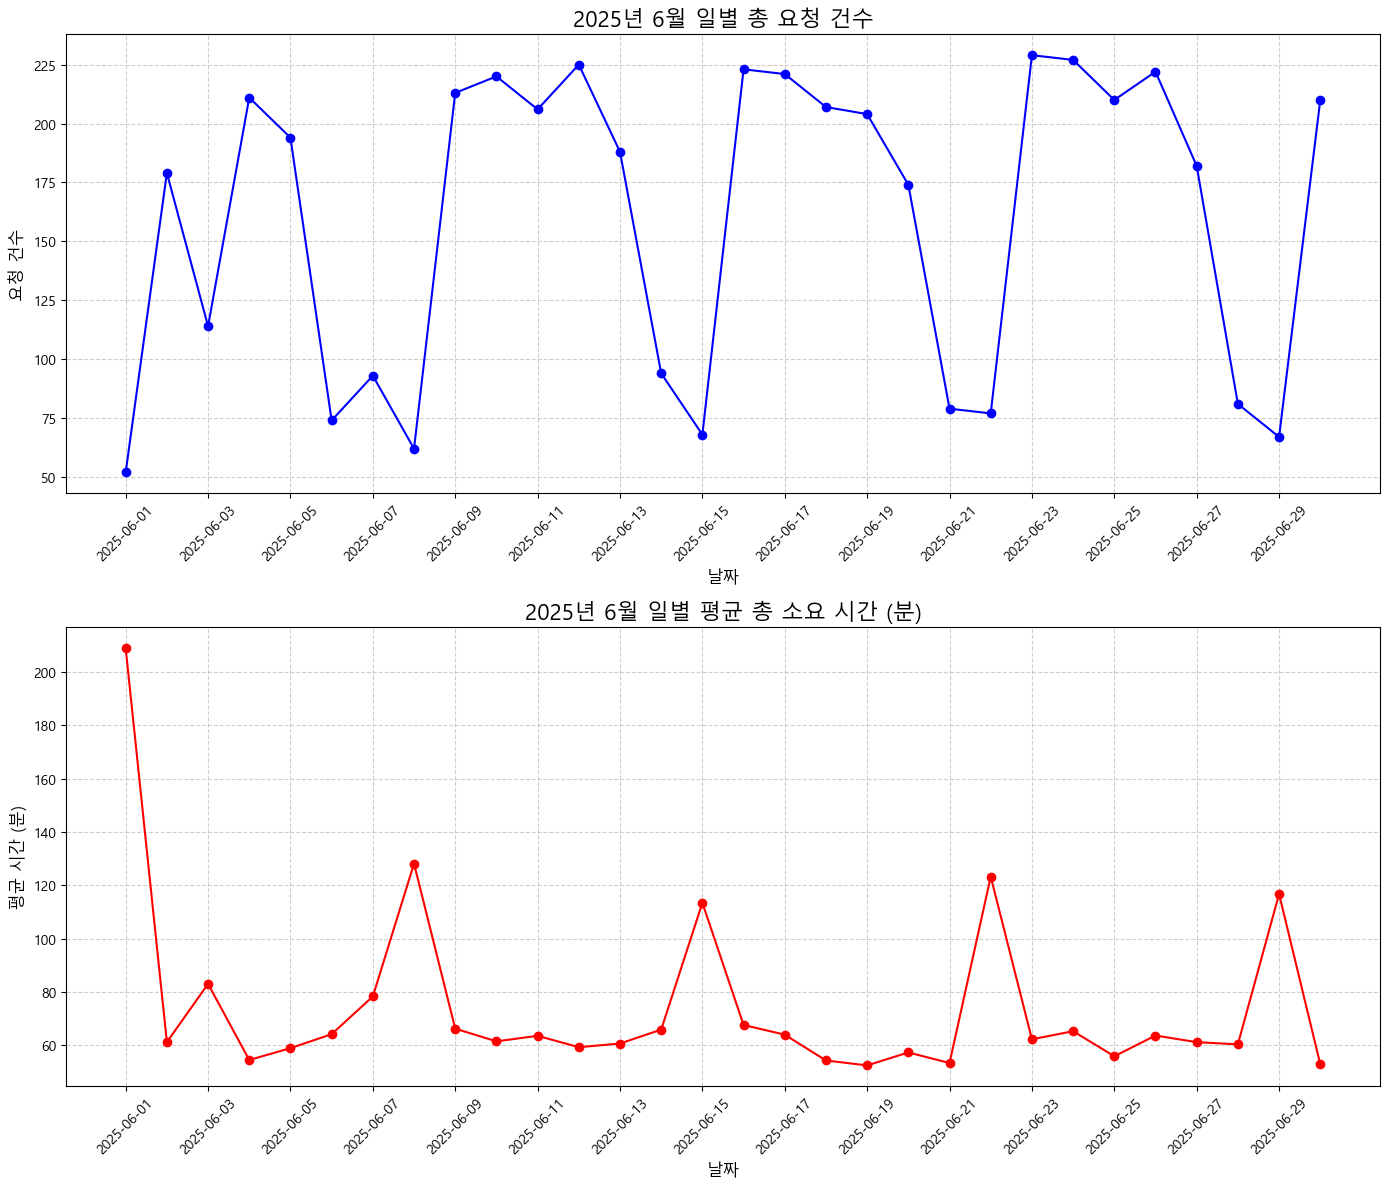

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os


# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
# Ïòà: r'C:\Users\hc_park\Desktop\ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò\results'
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# ÏßÄÏ†ïÎêú Ìè¥Îçî ÎÇ¥Ïùò Î™®Îì† CSV ÌååÏùº Î™©Î°ù Í∞ÄÏ†∏Ïò§Í∏∞
file_list = glob.glob(os.path.join(folder_path, 'baseline_demand_log_202506*.csv'))

if not file_list:
    print("ÏßÄÏ†ïÎêú Ìè¥ÎçîÏóêÏÑú ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
else:
    # Î™®Îì† ÌååÏùºÏùÑ Îã¥ÏùÑ Îπà Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
    dfs = []
    
    # Í∞Å ÌååÏùºÏùÑ ÏàúÌöåÌïòÎ©∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÏñ¥ÏôÄ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
    for file in file_list:
        df = pd.read_csv(file)
        dfs.append(df)

    # Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # requested ÏÉÅÌÉúÏù∏ ÎîîÎß®ÎìúÏùò Ìò∏Ï∂ú ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ 3ÏãúÍ∞Ñ(180Î∂Ñ)ÏúºÎ°ú Î≥ÄÍ≤Ω
    # .locÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î≥µÏÇ¨ Í≤ΩÍ≥†Î•º Î∞©ÏßÄÌïòÍ≥† ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏïàÏ†ÑÌïòÍ≤å ÏàòÏ†ïÌï©ÎãàÎã§.
    combined_df.loc[combined_df['status'] == 'REQUESTED', 'call_waiting_minutes'] = 180
    
    # Î≥ÄÍ≤ΩÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú ÌïúÎã¨Í∞ÑÏùò ÌèâÍ∑† Ìò∏Ï∂ú ÎåÄÍ∏∞ÏãúÍ∞ÑÍ≥º ÌîΩÏóÖ ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_call_waiting = combined_df['call_waiting_minutes'].mean()
    avg_pickup_waiting = combined_df['pickup_waiting_minutes'].mean()
    
    print("--- Î∂ÑÏÑù Í≤∞Í≥º ---")
    print(f"Í∞ÄÏ†ï Î≥ÄÍ≤Ω ÌõÑ ÏõîÍ∞Ñ ÌèâÍ∑† Ìò∏Ï∂ú ÎåÄÍ∏∞ÏãúÍ∞Ñ: {avg_call_waiting:.2f}Î∂Ñ")
    print(f"ÏõîÍ∞Ñ ÌèâÍ∑† ÌîΩÏóÖ ÎåÄÍ∏∞ÏãúÍ∞Ñ: {avg_pickup_waiting:.2f}Î∂Ñ")


# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows ÏÇ¨Ïö©ÏûêÏö©)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


if not file_list:
    print("ÏßÄÏ†ïÎêú Ìè¥ÎçîÏóêÏÑú ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. Í≤ΩÎ°úÎ•º Îã§Ïãú ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî.")
else:
    print(f"Ï¥ù {len(file_list)}Í∞úÏùò ÌååÏùºÏùÑ Ï∞æÏïòÏäµÎãàÎã§.")

    # Î™®Îì† ÌååÏùºÏùÑ Îã¥ÏùÑ Îπà Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
    dfs = []
    
    # Í∞Å ÌååÏùºÏùÑ ÏàúÌöåÌïòÎ©∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÏñ¥ÏôÄ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
    for file in file_list:
        df = pd.read_csv(file)
        dfs.append(df)

    # Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # 'call_time' Ïó¥ÏùÑ ÎÇ†Ïßú/ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    combined_df['call_time'] = pd.to_datetime(combined_df['call_time'])

    # --- 1. ÏõîÍ∞Ñ ÏöîÏ≤≠ ÏÉÅÌÉúÎ≥Ñ Í±¥Ïàò Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî ---
    status_counts = combined_df['status'].value_counts()
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar', color='skyblue')
    plt.title('2025ÎÖÑ 6Ïõî ÏõîÍ∞Ñ ÏöîÏ≤≠ ÏÉÅÌÉúÎ≥Ñ Í±¥Ïàò', fontsize=16)
    plt.xlabel('ÏöîÏ≤≠ ÏÉÅÌÉú', fontsize=12)
    plt.ylabel('Í±¥Ïàò', fontsize=12)
    plt.xticks(rotation=0)
    for index, value in enumerate(status_counts):
        plt.text(index, value + 10, str(value), ha='center')
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'monthly_status_counts.png'))
    print("1. 'monthly_status_counts.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

    # --- 2. ÏùºÎ≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ ÏãúÍ∞Ñ Ï∂îÏù¥ ÏãúÍ∞ÅÌôî ---
    daily_avg_waiting_time = combined_df.groupby(combined_df['call_time'].dt.date)[['call_waiting_minutes', 'pickup_waiting_minutes']].mean()
    plt.figure(figsize=(14, 8))
    daily_avg_waiting_time.plot(kind='line', marker='o', ax=plt.gca())
    plt.title('2025ÎÖÑ 6Ïõî ÏùºÎ≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ ÏãúÍ∞Ñ Ï∂îÏù¥', fontsize=16)
    plt.xlabel('ÎÇ†Ïßú', fontsize=12)
    plt.ylabel('ÌèâÍ∑† ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(['Ìò∏Ï∂ú ÎåÄÍ∏∞ ÏãúÍ∞Ñ', 'ÌîΩÏóÖ ÎåÄÍ∏∞ ÏãúÍ∞Ñ'])
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'monthly_avg_waiting_time_trend.png'))
    print("2. 'monthly_avg_waiting_time_trend.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

    # --- 3. ÏùºÎ≥Ñ Ï¥ù ÏöîÏ≤≠ Í±¥ÏàòÏôÄ ÌèâÍ∑† Ï¥ù ÏÜåÏöî ÏãúÍ∞Ñ(total_minutes) Ï∂îÏù¥ ÏãúÍ∞ÅÌôî ---
    daily_demand = combined_df.groupby(combined_df['call_time'].dt.date).size()
    daily_avg_minutes = combined_df.groupby(combined_df['call_time'].dt.date)['total_minutes'].mean()
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))
    axes[0].plot(daily_demand.index, daily_demand.values, marker='o', color='b')
    axes[0].set_title('2025ÎÖÑ 6Ïõî ÏùºÎ≥Ñ Ï¥ù ÏöîÏ≤≠ Í±¥Ïàò', fontsize=16)
    axes[0].set_xlabel('ÎÇ†Ïßú', fontsize=12)
    axes[0].set_ylabel('ÏöîÏ≤≠ Í±¥Ïàò', fontsize=12)
    axes[0].set_xticks(daily_demand.index[::2])
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[1].plot(daily_avg_minutes.index, daily_avg_minutes.values, marker='o', color='r')
    axes[1].set_title('2025ÎÖÑ 6Ïõî ÏùºÎ≥Ñ ÌèâÍ∑† Ï¥ù ÏÜåÏöî ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=16)
    axes[1].set_xlabel('ÎÇ†Ïßú', fontsize=12)
    axes[1].set_ylabel('ÌèâÍ∑† ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=12)
    axes[1].set_xticks(daily_avg_minutes.index[::2])
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.savefig(os.path.join(folder_path, 'monthly_demand_and_service_trends.png'))
    print("3. 'monthly_demand_and_service_trends.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

Ï¥ù 30Í∞úÏùò ÌååÏùºÏùÑ Ï∞æÏïòÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3332163798.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\monthly_hourly_total_waiting_by_day_type.png' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.


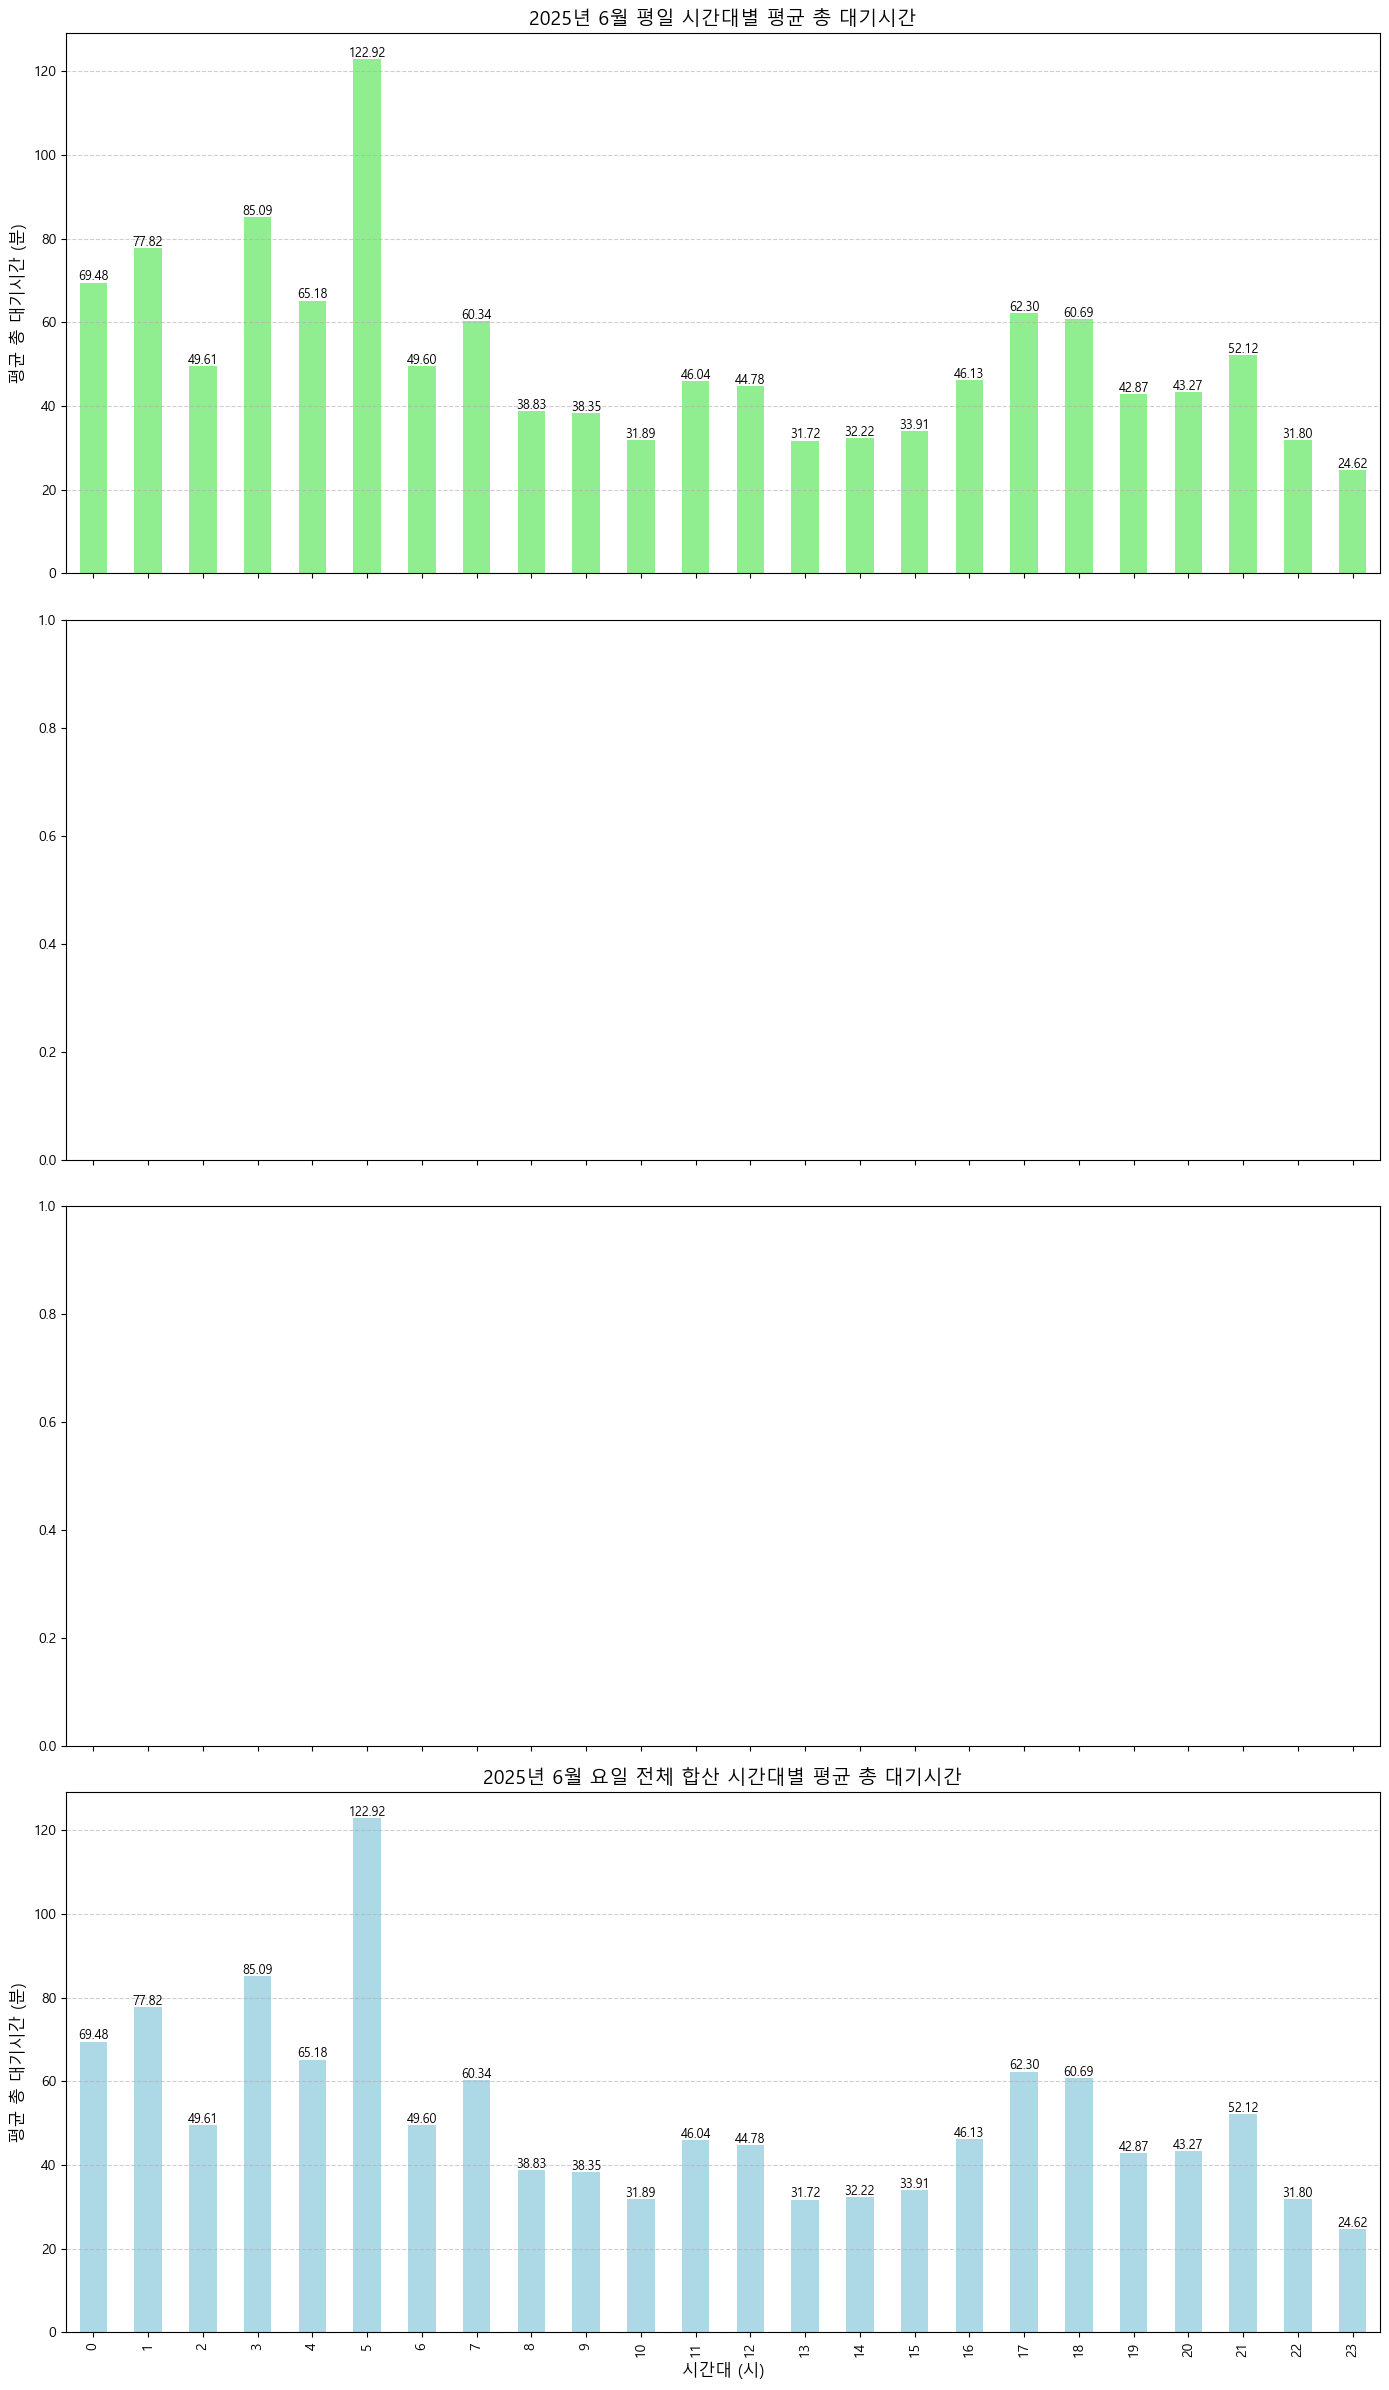

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# 'baseline_demand_log_202506'Î°ú ÏãúÏûëÌïòÎäî Î™®Îì† CSV ÌååÏùºÏùÑ Ï∞æÏïÑ Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
file_list = glob.glob(os.path.join(folder_path, 'baseline_scenario_202506*.csv'))

if not file_list:
    print(f"Ïò§Î•ò: ÏßÄÏ†ïÎêú Ìè¥ÎçîÏóê 'baseline_scenario_202506*.csv' ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\nÍ≤ΩÎ°ú: {folder_path}")
else:
    print(f"Ï¥ù {len(file_list)}Í∞úÏùò ÌååÏùºÏùÑ Ï∞æÏïòÏäµÎãàÎã§.")

    # Î™®Îì† ÌååÏùºÏùÑ Îã¥ÏùÑ Îπà Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
    dfs = []
    
    # Í∞Å ÌååÏùºÏùÑ ÏàúÌöåÌïòÎ©∞ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÏùΩÏñ¥ÏôÄ Î¶¨Ïä§Ìä∏Ïóê Ï∂îÍ∞Ä
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    # Î™®Îì† Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ìï©ÏπòÍ∏∞
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # 'call_time' Ïó¥ÏùÑ ÎÇ†Ïßú/ÏãúÍ∞Ñ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    # Ìò∏Ï∂ú ÎåÄÍ∏∞ÏãúÍ∞ÑÍ≥º ÌîΩÏóÖ ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎçîÌïú Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']

    # ÏöîÏùº Ï†ïÎ≥¥ Ï∂îÏ∂ú Î∞è ÏöîÏùº Ïú†Ìòï Î∂ÑÎ•ò
    combined_df['day_type'] = combined_df['request_time'].dt.dayofweek.apply(lambda x: 'ÌÜ†ÏöîÏùº' if x == 5 else ('ÏùºÏöîÏùº' if x == 6 else 'ÌèâÏùº'))

    # ÏöîÏùº Ïú†ÌòïÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï¥ù ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    hourly_avg_waiting_by_day = combined_df.groupby(['day_type', combined_df['request_time'].dt.hour])['total_waiting_minutes'].mean().unstack(level=0)
    
    # ÏöîÏùº Ï†ÑÏ≤¥Î•º Ìï©ÏÇ∞Ìïú ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï¥ù ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    hourly_avg_waiting_all_days = combined_df.groupby(combined_df['request_time'].dt.hour)['total_waiting_minutes'].mean()

    # ÏÑúÎ∏åÌîåÎ°ØÏùÑ Ìè¨Ìï®Ìïú Ï†ÑÏ≤¥ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 24), sharex=True)

    day_order = ['ÌèâÏùº', 'ÌÜ†ÏöîÏùº', 'ÏùºÏöîÏùº', 'ÏöîÏùº Ï†ÑÏ≤¥ Ìï©ÏÇ∞']
    colors = ['lightgreen', 'orange', 'lightcoral', 'lightblue']
    
    # Í∞Å ÏöîÏùº Ïú†ÌòïÎ≥Ñ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    for i, day in enumerate(day_order[:3]):
        ax = axes[i]
        if day in hourly_avg_waiting_by_day.columns:
            hourly_data = hourly_avg_waiting_by_day[day].reindex(range(24), fill_value=0)
            
            hourly_data.plot(kind='bar', ax=ax, color=colors[i])
            ax.set_title(f'2025ÎÖÑ 6Ïõî {day} ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ', fontsize=14)
            ax.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.6)
            
            for p in ax.patches:
                height = p.get_height()
                if not pd.isna(height):
                    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=9)
    
    # ÏöîÏùº Ï†ÑÏ≤¥ Ìï©ÏÇ∞ Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    ax_all = axes[3]
    hourly_avg_waiting_all_days = hourly_avg_waiting_all_days.reindex(range(24), fill_value=0)
    hourly_avg_waiting_all_days.plot(kind='bar', ax=ax_all, color=colors[3])
    ax_all.set_title('2025ÎÖÑ 6Ïõî ÏöîÏùº Ï†ÑÏ≤¥ Ìï©ÏÇ∞ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ', fontsize=14)
    ax_all.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=12)
    ax_all.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=12)
    ax_all.grid(axis='y', linestyle='--', alpha=0.6)
    for p in ax_all.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax_all.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.2f}', ha='center', fontsize=9)

    plt.tight_layout()

    plot_path = os.path.join(folder_path, 'monthly_hourly_total_waiting_by_day_type.png')
    plt.savefig(plot_path)

    print(f"'{plot_path}' Í∑∏ÎûòÌîÑÍ∞Ä ÏÉùÏÑ±ÎêòÏóàÏäµÎãàÎã§.")

1. [ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§] Baseline ÌååÏùº Î∂ÑÏÑù ÏãúÏûë
'baseline_demand_log_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.

2. [Í∂åÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§] Region Analysis ÌååÏùº Î∂ÑÏÑù ÏãúÏûë
'region_analysis_demand_log_50pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.


ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\depot_waiting_time_comparison.png'Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


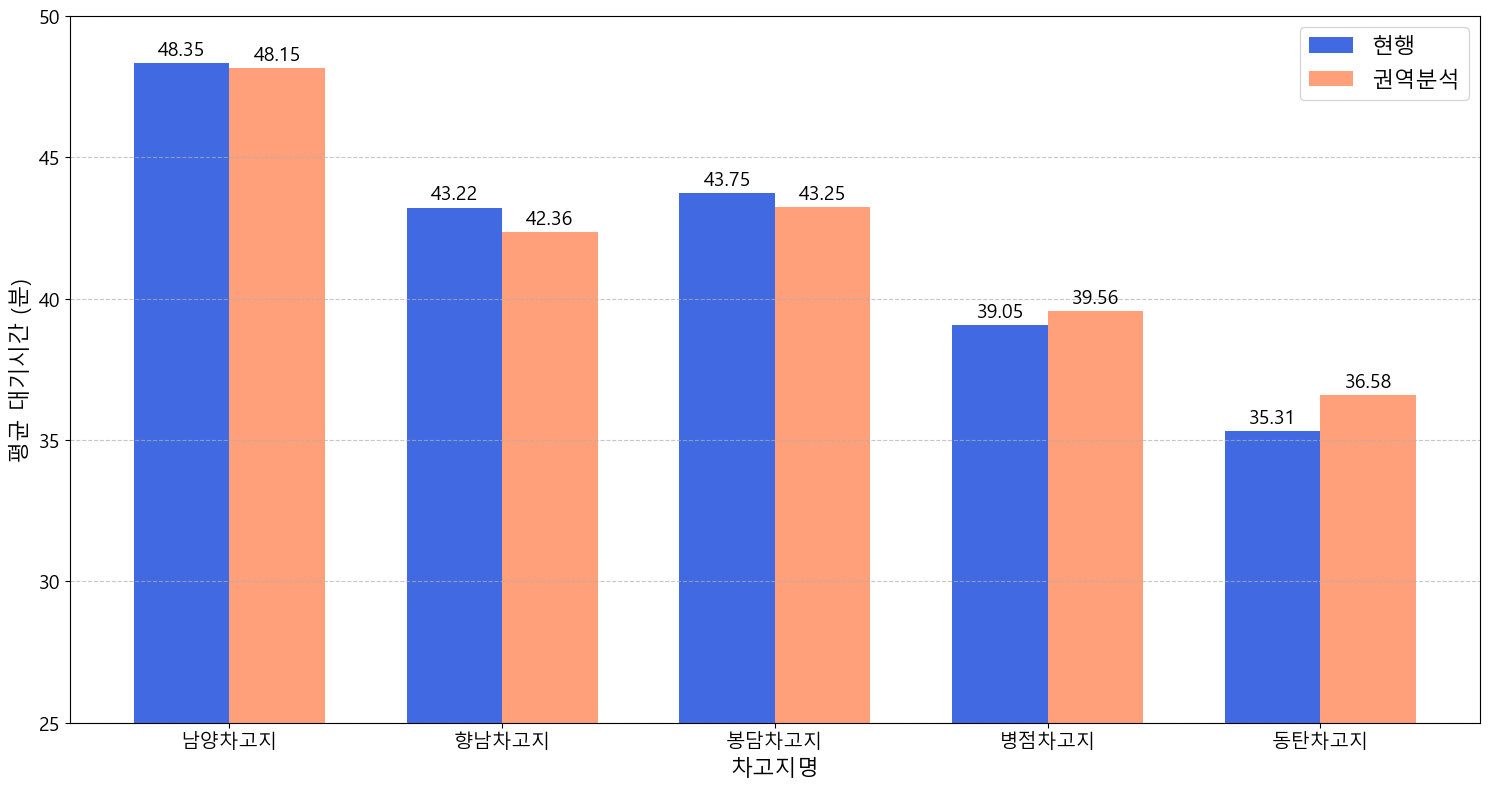

In [64]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def calculate_waiting_time_by_depot(file_pattern, folder_path):
    """
    ÏßÄÏ†ïÎêú Ìå®ÌÑ¥Ïùò ÌååÏùºÎì§ÏùÑ Î™®Îëê Î∂àÎü¨ÏôÄ pickup_depot_nameÎ≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    if not file_list:
        print(f"Í≤ΩÍ≥†: '{file_pattern}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file in file_list:
        try:
            df_temp = pd.read_csv(file, encoding='cp949')
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(file, encoding='utf-8')
            except UnicodeDecodeError:
                df_temp = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df_temp)

    combined_df = pd.concat(dfs, ignore_index=True)

    # ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (ÏΩú ÎåÄÍ∏∞ÏãúÍ∞Ñ + Ï∞®Îüâ ÎåÄÍ∏∞ÏãúÍ∞Ñ)
    if 'call_waiting_minutes' in combined_df.columns and 'pickup_waiting_minutes' in combined_df.columns:
        combined_df['total_waiting_minutes'] = combined_df['call_waiting_minutes'] + combined_df['pickup_waiting_minutes']
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'pickup_waiting_minutes' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None
    
    if 'pickup_depot_name' not in combined_df.columns:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'pickup_depot_name' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None

    avg_waiting_by_depot = combined_df.groupby('pickup_depot_name')['total_waiting_minutes'].mean()
    
    return avg_waiting_by_depot

def plot_waiting_times(baseline_data, region_analysis_data, folder_path):
    """
    Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò ÎåÄÍ∏∞ÏãúÍ∞Ñ Îç∞Ïù¥ÌÑ∞Î•º ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    """
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©
    df_plot = pd.DataFrame({
        'ÌòÑÌñâ': baseline_data,
        'Í∂åÏó≠Î∂ÑÏÑù': region_analysis_data
    }).fillna(0)
    
    # --- ÏàúÏÑú Î≥ÄÍ≤Ω ÏΩîÎìú Ï∂îÍ∞Ä ---
    # ÏõêÌïòÎäî Ï∞®Í≥†ÏßÄ ÏàúÏÑúÎ•º Î¶¨Ïä§Ìä∏Î°ú Ï†ïÏùò
    depot_order = ['ÎÇ®ÏñëÏ∞®Í≥†ÏßÄ', 'Ìñ•ÎÇ®Ï∞®Í≥†ÏßÄ', 'Î¥âÎã¥Ï∞®Í≥†ÏßÄ', 'Î≥ëÏ†êÏ∞®Í≥†ÏßÄ', 'ÎèôÌÉÑÏ∞®Í≥†ÏßÄ']
    
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò Ïù∏Îç±Ïä§Î•º Ïû¨Ï†ïÎ†¨ÌïòÏó¨ ÏàúÏÑúÎ•º Î≥ÄÍ≤Ω
    df_plot = df_plot.reindex(depot_order)
    # --- ÏàúÏÑú Î≥ÄÍ≤Ω ÏΩîÎìú Ï∂îÍ∞Ä ---
    
    labels = df_plot.index
    x = np.arange(len(labels))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(15, 8))
    rects1 = ax.bar(x - width/2, df_plot['ÌòÑÌñâ'], width, label='ÌòÑÌñâ', color='royalblue')
    rects2 = ax.bar(x + width/2, df_plot['Í∂åÏó≠Î∂ÑÏÑù'], width, label='Í∂åÏó≠Î∂ÑÏÑù', color='lightsalmon')
    
    ax.bar_label(rects1, padding=3, fmt='%.2f', fontsize=14)
    ax.bar_label(rects2, padding=3, fmt='%.2f', fontsize=14)

    plt.ylim(25, 50)
    
    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Í≥†ÏßÄ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=20)
    ax.set_xlabel('Ï∞®Í≥†ÏßÄÎ™Ö', fontsize=16)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=16)

    plt.xticks(x, labels, rotation=0, ha='center', fontsize=14)
    plt.yticks(fontsize=14)
    
    ax.legend(fontsize=16)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'depot_waiting_time_comparison.png')
    plt.savefig(plot_path)
    print(f"\nÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

# --- ÌååÏùº Í≤ΩÎ°ú Î∞è ÏãúÎÇòÎ¶¨Ïò§ Ï†ïÏùò ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'
baseline_pattern = 'baseline_demand_log_202506*.csv'
region_analysis_pattern = 'region_analysis_demand_log_50pct_202506*.csv'

# --- Í≤∞Í≥º Í≥ÑÏÇ∞ ---
print("="*50)
print("1. [ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§] Baseline ÌååÏùº Î∂ÑÏÑù ÏãúÏûë")
print("="*50)
baseline_results = calculate_waiting_time_by_depot(baseline_pattern, folder_path)

print("="*50)
print("2. [Í∂åÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§] Region Analysis ÌååÏùº Î∂ÑÏÑù ÏãúÏûë")
print("="*50)
region_analysis_results = calculate_waiting_time_by_depot(region_analysis_pattern, folder_path)

# --- Í≤∞Í≥º ÏãúÍ∞ÅÌôî ---
if baseline_results is not None and region_analysis_results is not None:
    plot_waiting_times(baseline_results, region_analysis_results, folder_path)
else:
    print("\nÎç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ïàò ÏóÜÏäµÎãàÎã§.")

1. [ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§] Baseline ÌååÏùº Î∂ÑÏÑù ÏãúÏûë
'baseline_demand_log_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.

2. [Í∂åÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§] Region Analysis ÌååÏùº Î∂ÑÏÑù ÏãúÏûë
'region_analysis_demand_log_50pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.


ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\depot_waiting_time_percentage_change.png'Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


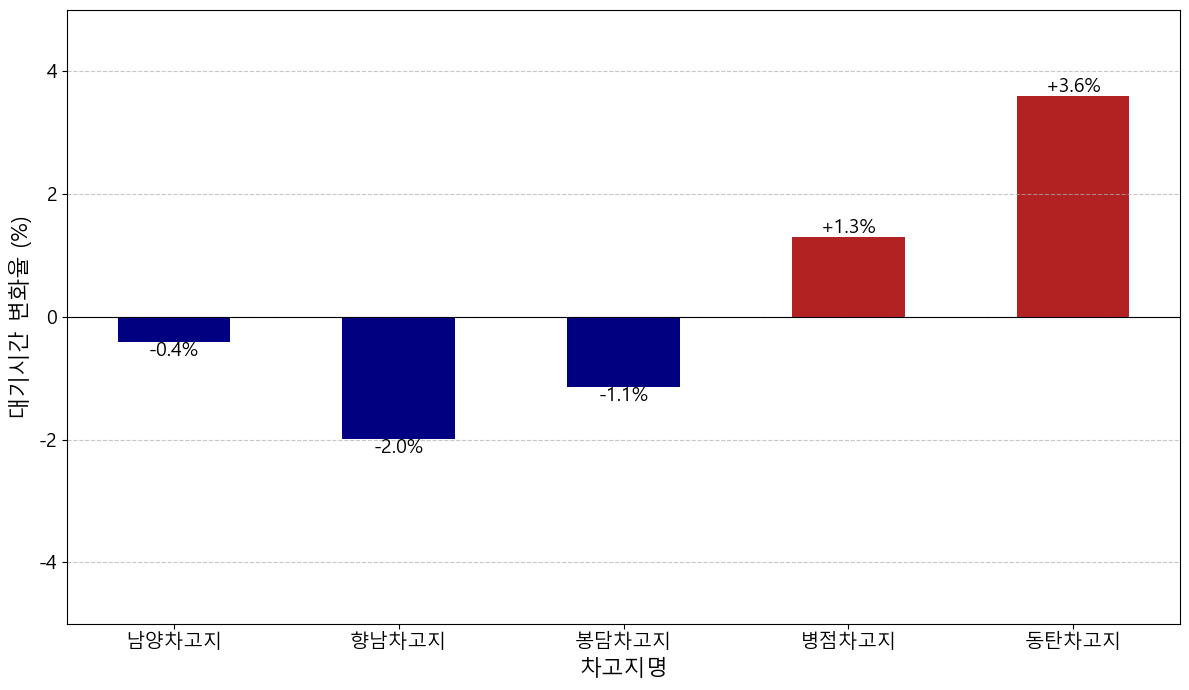

In [198]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.5

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò (ÏßÅÏ†ë Í∞í ÏÑ§Ï†ï)
y_min = -5 # ÏµúÏÜåÍ∞í
y_max = 5  # ÏµúÎåÄÍ∞í

def calculate_waiting_time_by_depot(file_pattern, folder_path):
    """
    ÏßÄÏ†ïÎêú Ìå®ÌÑ¥Ïùò ÌååÏùºÎì§ÏùÑ Î™®Îëê Î∂àÎü¨ÏôÄ pickup_depot_nameÎ≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    if not file_list:
        print(f"Í≤ΩÍ≥†: '{file_pattern}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file in file_list:
        try:
            df_temp = pd.read_csv(file, encoding='cp949')
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(file, encoding='utf-8')
            except UnicodeDecodeError:
                df_temp = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df_temp)

    combined_df = pd.concat(dfs, ignore_index=True)

    # ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (ÏΩú ÎåÄÍ∏∞ÏãúÍ∞Ñ + Ï∞®Îüâ ÎåÄÍ∏∞ÏãúÍ∞Ñ)
    if 'call_waiting_minutes' in combined_df.columns and 'pickup_waiting_minutes' in combined_df.columns:
        combined_df['total_waiting_minutes'] = combined_df['call_waiting_minutes'] + combined_df['pickup_waiting_minutes']
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'pickup_waiting_minutes' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None
    
    if 'pickup_depot_name' not in combined_df.columns:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'pickup_depot_name' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None

    avg_waiting_by_depot = combined_df.groupby('pickup_depot_name')['total_waiting_minutes'].mean()
    
    return avg_waiting_by_depot

def plot_percentage_change(baseline_data, region_analysis_data, folder_path, y_min, y_max):
    """
    ÌòÑÌñâ ÎåÄÎπÑ Ï¶ùÍ∞ê ÌçºÏÑºÌä∏Î•º ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    """
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï© Î∞è ÏàúÏÑú Ïû¨Ï†ïÎ†¨
    df_plot = pd.DataFrame({
        'ÌòÑÌñâ': baseline_data,
        'Í∂åÏó≠Î∂ÑÏÑù': region_analysis_data
    }).fillna(0)
    
    depot_order = ['ÎÇ®ÏñëÏ∞®Í≥†ÏßÄ', 'Ìñ•ÎÇ®Ï∞®Í≥†ÏßÄ', 'Î¥âÎã¥Ï∞®Í≥†ÏßÄ', 'Î≥ëÏ†êÏ∞®Í≥†ÏßÄ', 'ÎèôÌÉÑÏ∞®Í≥†ÏßÄ']
    df_plot = df_plot.reindex(depot_order)
    
    # ÌòÑÌñâ ÎåÄÎπÑ Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
    # ÌòÑÌñâ Îç∞Ïù¥ÌÑ∞Í∞Ä 0Ïù∏ Í≤ΩÏö∞, Î¨¥ÌïúÎåÄ ÎòêÎäî NaNÏù¥ ÎêòÏßÄ ÏïäÎèÑÎ°ù 0ÏúºÎ°ú Ï≤òÎ¶¨
    df_plot['Î≥ÄÌôîÏú® (%)'] = (df_plot['Í∂åÏó≠Î∂ÑÏÑù'] - df_plot['ÌòÑÌñâ']) / df_plot['ÌòÑÌñâ'] * 100
    df_plot.loc[df_plot['ÌòÑÌñâ'] == 0, 'Î≥ÄÌôîÏú® (%)'] = 0
    
    labels = df_plot.index
    x = np.arange(len(labels))
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # ÎßâÎåÄ ÏÉâÏÉÅ ÏÑ§Ï†ï: Ï¶ùÍ∞Ä(ÏñëÏàò)Îäî Ï¥àÎ°ùÏÉâ, Í∞êÏÜå(ÏùåÏàò)Îäî Îπ®Í∞ÑÏÉâ
    colors = ['firebrick' if val > 0 else 'navy' for val in df_plot['Î≥ÄÌôîÏú® (%)']]
    bars = ax.bar(x, df_plot['Î≥ÄÌôîÏú® (%)'], width=bar_width, color=colors)
    
    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f'{height:+.1f}%', # ÏñëÏàò/ÏùåÏàò Î∂ÄÌò∏ Ìè¨Ìï®, ÏÜåÏàòÏ†ê Ï≤´Ïß∏ ÏûêÎ¶¨ÍπåÏßÄ
                ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=value_fontsize)

    # 0% Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
    ax.axhline(0, color='black', linewidth=0.8)
    
    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    ax.set_ylim(y_min, y_max)
    
    #ax.set_title('ÌòÑÌñâ ÎåÄÎπÑ ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Í≥†ÏßÄ ÎåÄÍ∏∞ÏãúÍ∞Ñ Î≥ÄÌôîÏú®', fontsize=title_fontsize)
    ax.set_xlabel('Ï∞®Í≥†ÏßÄÎ™Ö', fontsize=label_fontsize)
    ax.set_ylabel('ÎåÄÍ∏∞ÏãúÍ∞Ñ Î≥ÄÌôîÏú® (%)', fontsize=label_fontsize)

    plt.xticks(x, labels, rotation=0, ha='center', fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'depot_waiting_time_percentage_change.png')
    plt.savefig(plot_path)
    print(f"\nÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


# --- ÌååÏùº Í≤ΩÎ°ú Î∞è ÏãúÎÇòÎ¶¨Ïò§ Ï†ïÏùò ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'
baseline_pattern = 'baseline_demand_log_202506*.csv'
region_analysis_pattern = 'region_analysis_demand_log_50pct_202506*.csv'

# --- Í≤∞Í≥º Í≥ÑÏÇ∞ ---
print("="*50)
print("1. [ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§] Baseline ÌååÏùº Î∂ÑÏÑù ÏãúÏûë")
print("="*50)
baseline_results = calculate_waiting_time_by_depot(baseline_pattern, folder_path)

print("="*50)
print("2. [Í∂åÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§] Region Analysis ÌååÏùº Î∂ÑÏÑù ÏãúÏûë")
print("="*50)
region_analysis_results = calculate_waiting_time_by_depot(region_analysis_pattern, folder_path)

# --- Í≤∞Í≥º ÏãúÍ∞ÅÌôî ---
if baseline_results is not None and region_analysis_results is not None:
    plot_percentage_change(baseline_results, region_analysis_results, folder_path, y_min, y_max)
else:
    print("\nÎç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v21_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v22_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v23_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v24_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v25_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v26_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v27_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v28_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v29_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3145864213.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\scenario_waiting_times_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


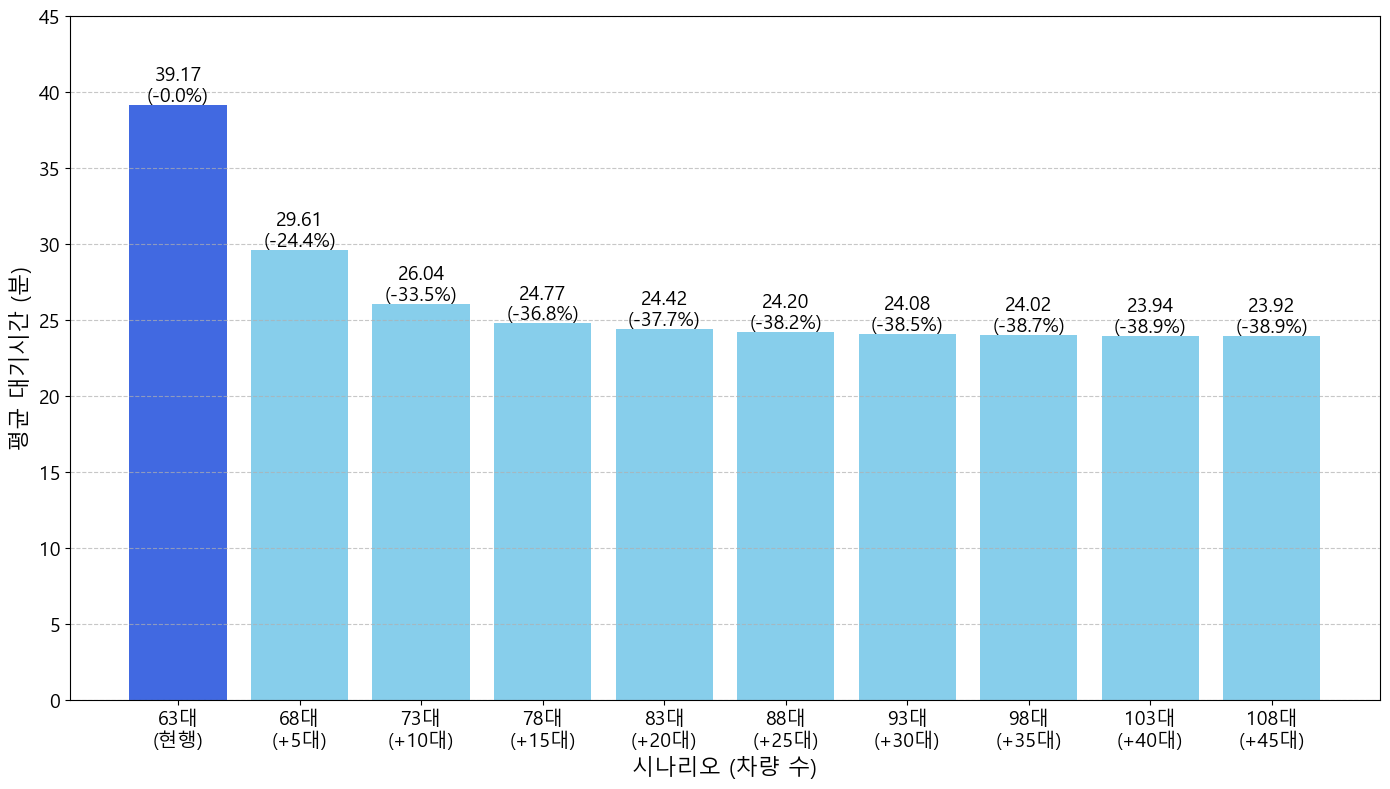

In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 0
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': '63ÎåÄ\n(ÌòÑÌñâ)', 'average_time': avg_baseline})

# --- 2. Ï∂îÍ∞Ä Ï∞®ÎüâÏàò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
for n_additional in range(21, 30):
    #m_total = 68 + (n_additional - 1) * 5
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_name = f'{63+(n_additional-20)*5}ÎåÄ\n(+{(n_additional-20)*5}ÎåÄ)'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞
    baseline_time = df_results[df_results['scenario_name'] == '63ÎåÄ\n(ÌòÑÌñâ)']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îßå Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÏßÄÏ†ï
    colors = ['royalblue'] + ['skyblue'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§ (Ï∞®Îüâ Ïàò)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï (Îëê Ï§ÑÎ°ú ÌëúÏãú)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Í∞êÏÜåÏú® ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îäî Í∞êÏÜåÏú®ÏùÑ ÌëúÏãúÌïòÏßÄ ÏïäÏùå
        if scenario_name == 'ÌòÑÌñâ':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\baseline_vs_universal_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2201626489.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


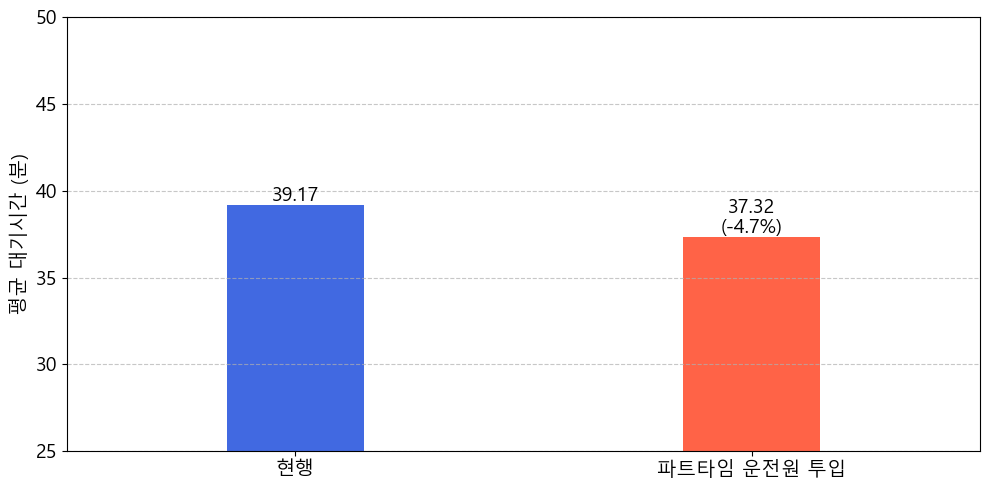

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# ÎßâÎåÄ ÎÑàÎπÑ Ï°∞Ï†à (Í∏∞Î≥∏Í∞í: 0.8)
bar_width = 0.3

def calculate_group_average(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌòÑÌñâ', 'average_time': avg_baseline})

# --- 2. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
universal_file_list = glob.glob(os.path.join(folder_path, 'scheduled_increase_scenario_v1_202506*.csv'))
avg_universal = calculate_group_average(universal_file_list, 'scheduled_increase_scenario_v1')
if avg_universal is not None:
    scenario_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ', 'average_time': avg_universal})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data and len(scenario_data) > 1:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏÉâÏÉÅ ÏßÄÏ†ï
    colors = ['royalblue', 'tomato']

    # Í∑∏ÎûòÌîÑ ÌÅ¨Í∏∞Î•º Ï§ÑÏó¨ Ï§ëÏïôÏóê ÏúÑÏπòÌïòÎèÑÎ°ù Ï°∞Ï†ï
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], width=bar_width, color=colors)
    
    # xÏ∂ï Î≤îÏúÑÏóê Ïó¨Î∞±ÏùÑ Ï£ºÏñ¥ Ï§ëÏïô Ï†ïÎ†¨ Ìö®Í≥º
    ax.set_xlim(-0.5, len(df_results) - 0.5)

    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    #ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        scenario_name = df_results['scenario_name'].iloc[i]
        
        text_to_display = f'{height:.2f}'
        
        # 'Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ x' ÏãúÎÇòÎ¶¨Ïò§Ïù∏ Í≤ΩÏö∞ÏóêÎßå Î≥ÄÌôîÏú® Í≥ÑÏÇ∞ Î∞è Ï∂îÍ∞Ä
        if scenario_name == 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ' and avg_baseline is not None:
            # ÌòÑÌñâ ÎåÄÎπÑ Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            
            # Î≥ÄÌôîÏú® ÌÖçÏä§Ìä∏ ÌòïÏãù ÏÑ§Ï†ï (ÏñëÏàò/ÏùåÏàò Î∂ÄÌò∏ Ìè¨Ìï®)
            text_to_display += f'\n({percentage_change:+.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'baseline_vs_universal_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1152076075.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\grouped_waiting_times_comparison_reordered.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


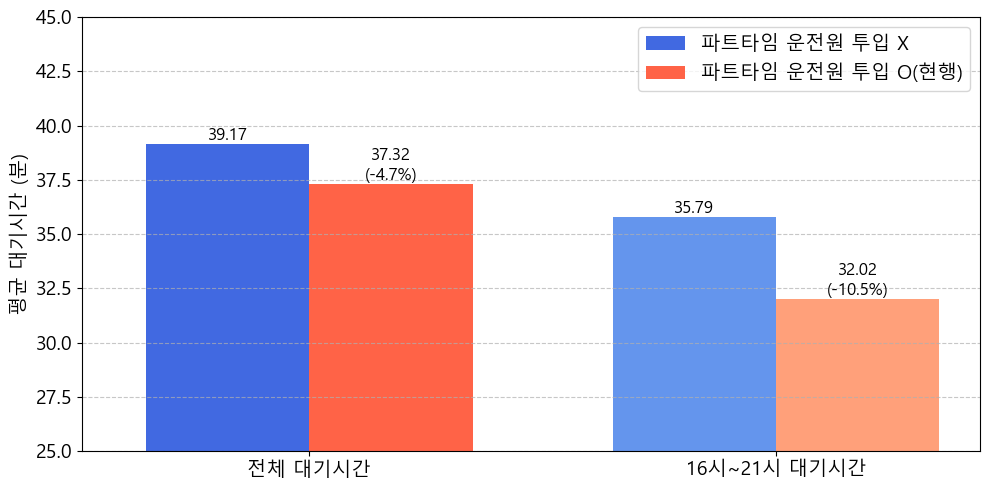

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 12

# ÎßâÎåÄ ÎÑàÎπÑ Ï°∞Ï†à (Í∏∞Î≥∏Í∞í: 0.8)
bar_width = 0.35

def calculate_waiting_times(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê Ï†ÑÏ≤¥ Î∞è 16~21ÏãúÏùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None, None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    # Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
    avg_overall = combined_df['calculated_waiting_minutes'].mean()
    
    # 16Ïãú~21Ïãú Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    # ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ None Î∞òÌôò
    if filtered_df.empty:
        print(f"Í≤ΩÍ≥†: '{group_name}' ÏãúÎÇòÎ¶¨Ïò§Ïóê 16Ïãú~21Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        avg_filtered = None
    else:
        avg_filtered = filtered_df['calculated_waiting_minutes'].mean()
    
    return avg_overall, avg_filtered

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Ïùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_overall_baseline, avg_filtered_baseline = calculate_waiting_times(baseline_file_list, 'baseline_with_shift')

universal_file_list = glob.glob(os.path.join(folder_path, 'scheduled_increase_scenario_v1_202506*.csv'))
avg_overall_universal, avg_filtered_universal = calculate_waiting_times(universal_file_list, 'scheduled_increase_scenario_v1')

# --- Í∑∏ÎûòÌîÑÏö© Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ ---
if avg_overall_baseline is not None and avg_overall_universal is not None and \
   avg_filtered_baseline is not None and avg_filtered_universal is not None:
    
    # ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    time_categories = ['Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ', '16Ïãú~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ']
    
    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉâÏÉÅ
    baseline_data = [avg_overall_baseline, avg_filtered_baseline]
    baseline_colors = ['royalblue', 'cornflowerblue']

    # ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉâÏÉÅ
    universal_data = [avg_overall_universal, avg_filtered_universal]
    universal_colors = ['tomato', 'lightsalmon']

    # --- Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(time_categories))
    
    # 'ÌòÑÌñâ' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars1 = ax.bar(x - bar_width/2, baseline_data, width=bar_width, color=baseline_colors)
    
    # 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars2 = ax.bar(x + bar_width/2, universal_data, width=bar_width, color=universal_colors)
    
    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(time_categories, fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Î≥ÄÌôîÏú® ÌëúÏãú
    # 'ÌòÑÌñâ' ÎßâÎåÄ
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=value_fontsize)
    
    # 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ' ÎßâÎåÄ (ÌòÑÌñâ ÎåÄÎπÑ Î≥ÄÌôîÏú® Ìè¨Ìï®)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        # Î≥ÄÌôîÏú® Í≥ÑÏÇ∞: ÌååÌä∏ÌÉÄÏûÑÏùò Í∞Å ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÏù¥ ÌòÑÌñâÏùò Í∞ôÏùÄ ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÍ≥º ÎπÑÍµêÎê®
        percentage = ((height - baseline_data[i]) / baseline_data[i]) * 100
        text_to_display = f'{height:.2f}\n({percentage:+.1f}%)'
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, ha='center', va='bottom', fontsize=value_fontsize)

    # Î≤îÎ°Ä ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÏûÑÏãú ÎßâÎåÄ Ï∂îÍ∞Ä (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉÅÍ¥Ä ÏóÜÏùå)
    ax.bar(0, 0, color='royalblue', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ X')
    ax.bar(0, 0, color='tomato', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ O(ÌòÑÌñâ)')
    ax.legend(fontsize=label_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'grouped_waiting_times_comparison_reordered.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_scenario_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.
'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1469764555.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1469764555.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


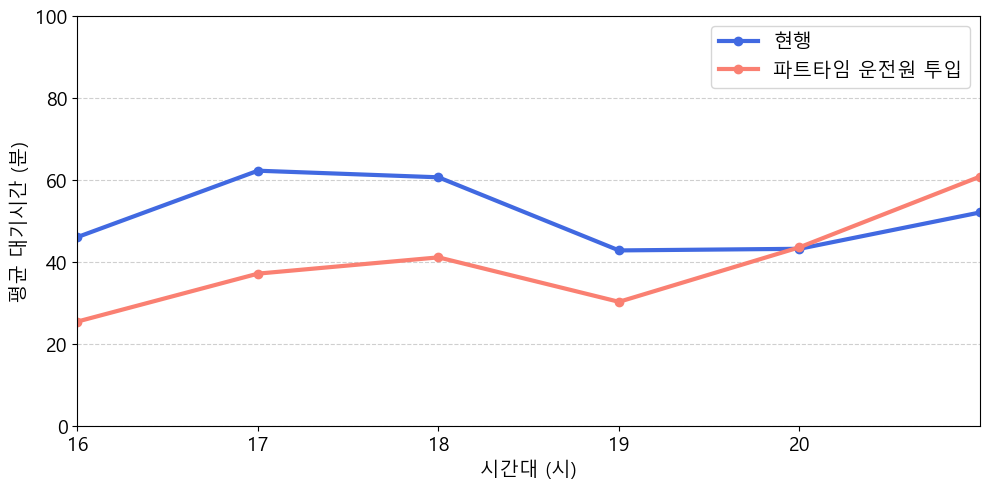

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

def get_hourly_average(file_pattern, folder_path):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']
    
    hourly_avg = combined_df.groupby(combined_df['request_time'].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_scenario_202506*.csv', folder_path)
universal_hourly_avg = get_hourly_average('scheduled_increase_scenario_v1_202506*.csv', folder_path)

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌòÑÌñâ', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ', color='salmon', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    # ax Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ XÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    ax.set_xlim(16, 21)
    # XÏ∂ï ÎààÍ∏àÎèÑ Î≤îÏúÑÏóê ÎßûÏ∂∞ ÏÑ§Ï†ï
    ax.set_xticks(range(16, 21))
    
    ax.set_ylim(0, 100)

    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2301523778.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2301523778.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


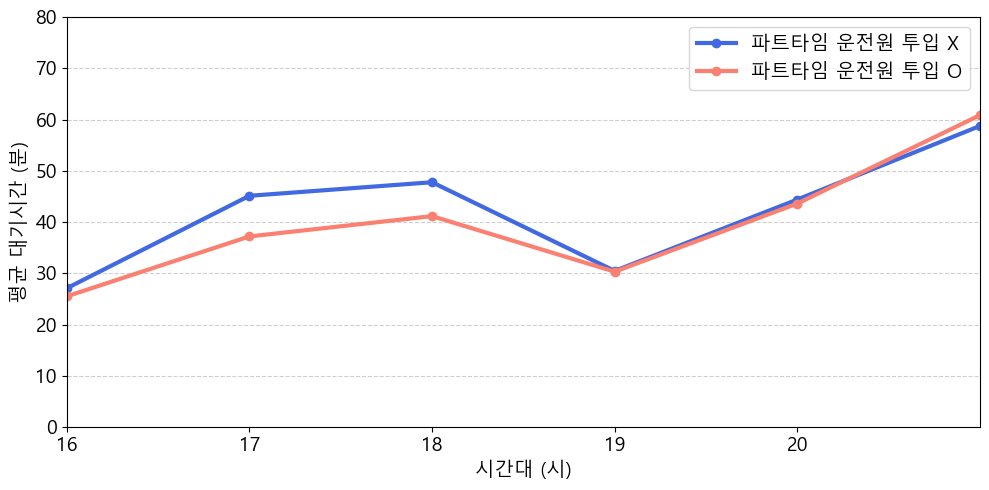

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

def get_hourly_average(file_pattern, folder_path):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']
    
    hourly_avg = combined_df.groupby(combined_df['request_time'].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path)
universal_hourly_avg = get_hourly_average('scheduled_increase_scenario_v1_202506*.csv', folder_path)

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ X', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ O', color='salmon', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    # ax Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ XÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    ax.set_xlim(16, 21)
    # XÏ∂ï ÎààÍ∏àÎèÑ Î≤îÏúÑÏóê ÎßûÏ∂∞ ÏÑ§Ï†ï
    ax.set_xticks(range(16, 21))
    
    ax.set_ylim(0, 80)

    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

1. [ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§] Baseline ÌååÏùº Î∂ÑÏÑù ÏãúÏûë
'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.

2. [Í∂åÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§] Region Analysis ÌååÏùº Î∂ÑÏÑù ÏãúÏûë
'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.


ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\depot_waiting_time_percentage_change.png'Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


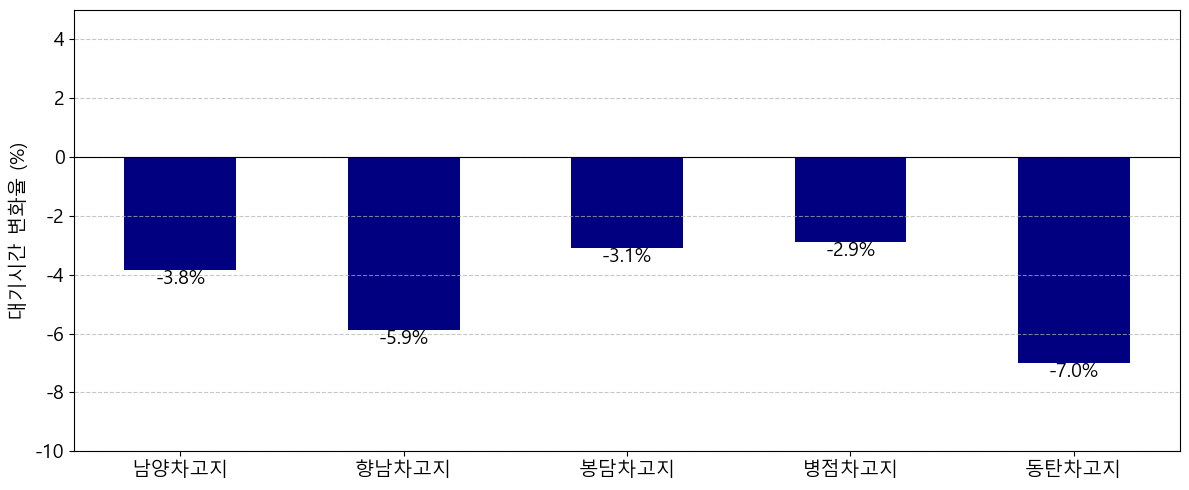

In [351]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.5

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò (ÏßÅÏ†ë Í∞í ÏÑ§Ï†ï)
y_min = -10 # ÏµúÏÜåÍ∞í
y_max = 5 # ÏµúÎåÄÍ∞í

def calculate_waiting_time_by_depot(file_pattern, folder_path):
    """
    ÏßÄÏ†ïÎêú Ìå®ÌÑ¥Ïùò ÌååÏùºÎì§ÏùÑ Î™®Îëê Î∂àÎü¨ÏôÄ pickup_depot_nameÎ≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    if not file_list:
        print(f"Í≤ΩÍ≥†: '{file_pattern}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file in file_list:
        try:
            df_temp = pd.read_csv(file, encoding='cp949')
        except UnicodeDecodeError:
            try:
                df_temp = pd.read_csv(file, encoding='utf-8')
            except UnicodeDecodeError:
                df_temp = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df_temp)

    combined_df = pd.concat(dfs, ignore_index=True)

    # ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (ÏΩú ÎåÄÍ∏∞ÏãúÍ∞Ñ + Ï∞®Îüâ ÎåÄÍ∏∞ÏãúÍ∞Ñ)
    if 'call_waiting_time' in combined_df.columns and 'pickup_waiting_time' in combined_df.columns:
        combined_df['total_waiting_minutes'] = combined_df['call_waiting_time'] + combined_df['pickup_waiting_time']
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'pickup_waiting_minutes' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None
    
    if 'pickup_depot_name' not in combined_df.columns:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'pickup_depot_name' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return None

    avg_waiting_by_depot = combined_df.groupby('pickup_depot_name')['total_waiting_minutes'].mean()
    
    return avg_waiting_by_depot

def plot_percentage_change(baseline_data, region_analysis_data, folder_path, y_min, y_max):
    """
    ÌòÑÌñâ ÎåÄÎπÑ Ï¶ùÍ∞ê ÌçºÏÑºÌä∏Î•º ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌï©ÎãàÎã§.
    """
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï© Î∞è ÏàúÏÑú Ïû¨Ï†ïÎ†¨
    df_plot = pd.DataFrame({
        'ÌòÑÌñâ': baseline_data,
        'Í∂åÏó≠Î∂ÑÏÑù': region_analysis_data
    }).fillna(0)
    
    depot_order = ['ÎÇ®ÏñëÏ∞®Í≥†ÏßÄ', 'Ìñ•ÎÇ®Ï∞®Í≥†ÏßÄ', 'Î¥âÎã¥Ï∞®Í≥†ÏßÄ', 'Î≥ëÏ†êÏ∞®Í≥†ÏßÄ', 'ÎèôÌÉÑÏ∞®Í≥†ÏßÄ']
    df_plot = df_plot.reindex(depot_order)
    
    # ÌòÑÌñâ ÎåÄÎπÑ Î≥ÄÌôîÏú® Í≥ÑÏÇ∞
    # ÌòÑÌñâ Îç∞Ïù¥ÌÑ∞Í∞Ä 0Ïù∏ Í≤ΩÏö∞, Î¨¥ÌïúÎåÄ ÎòêÎäî NaNÏù¥ ÎêòÏßÄ ÏïäÎèÑÎ°ù 0ÏúºÎ°ú Ï≤òÎ¶¨
    df_plot['Î≥ÄÌôîÏú® (%)'] = (df_plot['Í∂åÏó≠Î∂ÑÏÑù'] - df_plot['ÌòÑÌñâ']) / df_plot['ÌòÑÌñâ'] * 100
    df_plot.loc[df_plot['ÌòÑÌñâ'] == 0, 'Î≥ÄÌôîÏú® (%)'] = 0
    
    labels = df_plot.index
    x = np.arange(len(labels))
    
    fig, ax = plt.subplots(figsize=(12, 5))
    
    # ÎßâÎåÄ ÏÉâÏÉÅ ÏÑ§Ï†ï: Ï¶ùÍ∞Ä(ÏñëÏàò)Îäî Ï¥àÎ°ùÏÉâ, Í∞êÏÜå(ÏùåÏàò)Îäî Îπ®Í∞ÑÏÉâ
    colors = ['firebrick' if val > 0 else 'navy' for val in df_plot['Î≥ÄÌôîÏú® (%)']]
    bars = ax.bar(x, df_plot['Î≥ÄÌôîÏú® (%)'], width=bar_width, color=colors)
    
    # ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, 
                f'{height:+.1f}%', # ÏñëÏàò/ÏùåÏàò Î∂ÄÌò∏ Ìè¨Ìï®, ÏÜåÏàòÏ†ê Ï≤´Ïß∏ ÏûêÎ¶¨ÍπåÏßÄ
                ha='center', va='bottom' if height >= 0 else 'top', 
                fontsize=value_fontsize)

    # 0% Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
    ax.axhline(0, color='black', linewidth=0.8)
    
    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    ax.set_ylim(y_min, y_max)
    
    #ax.set_title('ÌòÑÌñâ ÎåÄÎπÑ ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Ï∞®Í≥†ÏßÄ ÎåÄÍ∏∞ÏãúÍ∞Ñ Î≥ÄÌôîÏú®', fontsize=title_fontsize)
    #ax.set_xlabel('Ï∞®Í≥†ÏßÄÎ™Ö', fontsize=label_fontsize)
    ax.set_ylabel('ÎåÄÍ∏∞ÏãúÍ∞Ñ Î≥ÄÌôîÏú® (%)', fontsize=label_fontsize)

    plt.xticks(x, labels, rotation=0, ha='center', fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'depot_waiting_time_percentage_change.png')
    plt.savefig(plot_path)
    print(f"\nÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê ÏÑ±Í≥µÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")


# --- ÌååÏùº Í≤ΩÎ°ú Î∞è ÏãúÎÇòÎ¶¨Ïò§ Ï†ïÏùò ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'
baseline_pattern = 'baseline_with_shift_202506*.csv'
region_analysis_pattern = 'scheduled_increase_scenario_v1_202506*.csv'

# --- Í≤∞Í≥º Í≥ÑÏÇ∞ ---
print("="*50)
print("1. [ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§] Baseline ÌååÏùº Î∂ÑÏÑù ÏãúÏûë")
print("="*50)
baseline_results = calculate_waiting_time_by_depot(baseline_pattern, folder_path)

print("="*50)
print("2. [Í∂åÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§] Region Analysis ÌååÏùº Î∂ÑÏÑù ÏãúÏûë")
print("="*50)
region_analysis_results = calculate_waiting_time_by_depot(region_analysis_pattern, folder_path)

# --- Í≤∞Í≥º ÏãúÍ∞ÅÌôî ---
if baseline_results is not None and region_analysis_results is not None:
    plot_percentage_change(baseline_results, region_analysis_results, folder_path, y_min, y_max)
else:
    print("\nÎç∞Ïù¥ÌÑ∞Í∞Ä Ï∂©Î∂ÑÌïòÏßÄ ÏïäÏïÑ Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¥ Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v6_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v7_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî ÏÑ† Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\scenario_waiting_times_line_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2422849148.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


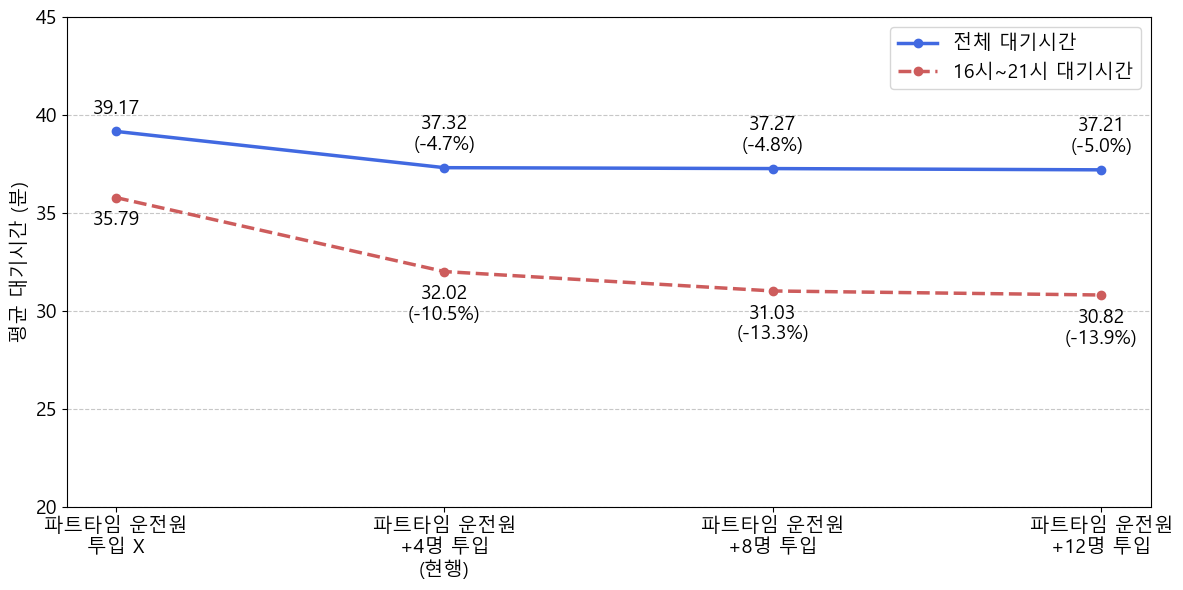

In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 20
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# ÏÑ† ÍµµÍ∏∞ Ï°∞Ï†à
line_width = 2.5

def get_combined_df(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê Ï†ÑÏ≤òÎ¶¨Îêú DataFrameÏùÑ Î∞òÌôòÌï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """
    Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if combined_df is None:
        return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df):
    """
    16ÏãúÎ∂ÄÌÑ∞ 21ÏãúÍπåÏßÄÏùò ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if combined_df is None:
        return None
    
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    if filtered_df.empty:
        print("Í≤ΩÍ≥†: 16Ïãú~21Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()


# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
overall_data = []
filtered_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
baseline_df = get_combined_df(baseline_file_list, 'baseline_demand_log')

avg_overall_baseline = calculate_overall_average(baseline_df)
avg_filtered_baseline = calculate_filtered_average(baseline_df)

if avg_overall_baseline is not None:
    overall_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X', 'average_time': avg_overall_baseline})
    filtered_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X', 'average_time': avg_filtered_baseline})

# --- 2. Ï∂îÍ∞Ä Ï∞®ÎüâÏàò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
for n_additional in (1, 6, 7):
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    additional_df = get_combined_df(additional_file_list, file_pattern)
    
    avg_overall_additional = calculate_overall_average(additional_df)
    avg_filtered_additional = calculate_filtered_average(additional_df)
    
    if n_additional == 1:
        n_additional_alpha = 4
    if n_additional == 6:
        n_additional_alpha = 8
    if n_additional == 7:
        n_additional_alpha = 12
        
    if avg_overall_additional is not None:
        if n_additional == 1:
            scenario_name = f'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\n+{n_additional_alpha}Î™Ö Ìà¨ÏûÖ\n(ÌòÑÌñâ)'
        else:
            scenario_name = f'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\n+{n_additional_alpha}Î™Ö Ìà¨ÏûÖ'
        
        overall_data.append({'scenario_name': scenario_name, 'average_time': avg_overall_additional})
        filtered_data.append({'scenario_name': scenario_name, 'average_time': avg_filtered_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± (ÏÑ† Í∑∏ÎûòÌîÑ) ---
if overall_data:
    df_overall = pd.DataFrame(overall_data)
    df_filtered = pd.DataFrame(filtered_data)
    
    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò Ï†ÑÏ≤¥ Î∞è ÌïÑÌÑ∞ÎßÅÎêú ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞
    baseline_overall_time = df_overall[df_overall['scenario_name'] == 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X']['average_time'].iloc[0]
    baseline_filtered_time = df_filtered[df_filtered['scenario_name'] == 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X']['average_time'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    ax.plot(df_overall['scenario_name'], df_overall['average_time'], marker='o', linestyle='-', linewidth=line_width, color='royalblue', label='Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ')
    
    # 16~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    ax.plot(df_filtered['scenario_name'], df_filtered['average_time'], marker='o', linestyle='--', linewidth=line_width, color='indianred', label='16Ïãú~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ')
    
    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.legend(fontsize=label_fontsize)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ ÏúÑÏóê Í∞í Î∞è Í∞êÏÜåÏú® ÌëúÏãú
    y_offset_overall = 0.7  # Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌÖçÏä§Ìä∏Î•º ÏúÑÎ°ú Ïò¨Î¶¥ Ïò§ÌîÑÏÖã
    y_offset_filtered = -0.7 # 16~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌÖçÏä§Ìä∏Î•º ÏïÑÎûòÎ°ú ÎÇ¥Î¶¥ Ïò§ÌîÑÏÖã

    for index, row in df_overall.iterrows():
        text_overall = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X':
            decrease_rate = ((baseline_overall_time - row['average_time']) / baseline_overall_time) * 100
            text_overall += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_overall, text_overall, ha='center', va='bottom', fontsize=value_fontsize)

    for index, row in df_filtered.iterrows():
        text_filtered = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X':
            decrease_rate = ((baseline_filtered_time - row['average_time']) / baseline_filtered_time) * 100
            text_filtered += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_filtered, text_filtered, ha='center', va='top', fontsize=value_fontsize)

    plt.tight_layout()
    
    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_line_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî ÏÑ† Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2527933515.py:52: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\grouped_waiting_times_comparison_reordered.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


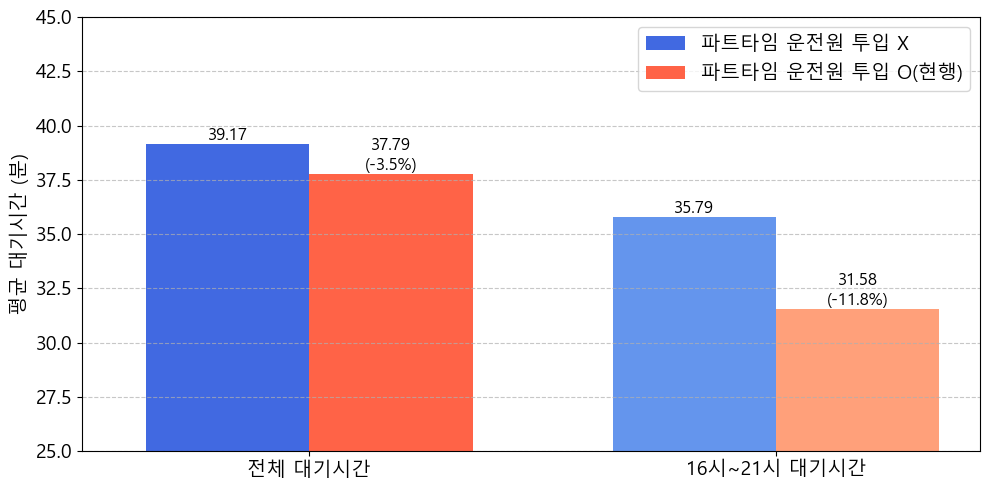

In [372]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 12

# ÎßâÎåÄ ÎÑàÎπÑ Ï°∞Ï†à (Í∏∞Î≥∏Í∞í: 0.8)
bar_width = 0.35

def calculate_waiting_times(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê Ï†ÑÏ≤¥ Î∞è 16~21ÏãúÏùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None, None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    # Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
    avg_overall = combined_df['calculated_waiting_minutes'].mean()
    
    # 16Ïãú~21Ïãú Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    # ÌïÑÌÑ∞ÎßÅÎêú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏúºÎ©¥ None Î∞òÌôò
    if filtered_df.empty:
        print(f"Í≤ΩÍ≥†: '{group_name}' ÏãúÎÇòÎ¶¨Ïò§Ïóê 16Ïãú~21Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")
        avg_filtered = None
    else:
        avg_filtered = filtered_df['calculated_waiting_minutes'].mean()
    
    return avg_overall, avg_filtered

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Ïùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_overall_baseline, avg_filtered_baseline = calculate_waiting_times(baseline_file_list, 'baseline_with_shift')

universal_file_list = glob.glob(os.path.join(folder_path, 'scheduled_increase_scenario_v4_202506*.csv'))
avg_overall_universal, avg_filtered_universal = calculate_waiting_times(universal_file_list, 'scheduled_increase_scenario_v1')

# --- Í∑∏ÎûòÌîÑÏö© Îç∞Ïù¥ÌÑ∞ Ï†ïÎ¶¨ ---
if avg_overall_baseline is not None and avg_overall_universal is not None and \
   avg_filtered_baseline is not None and avg_filtered_universal is not None:
    
    # ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
    time_categories = ['Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ', '16Ïãú~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ']
    
    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉâÏÉÅ
    baseline_data = [avg_overall_baseline, avg_filtered_baseline]
    baseline_colors = ['royalblue', 'cornflowerblue']

    # ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉâÏÉÅ
    universal_data = [avg_overall_universal, avg_filtered_universal]
    universal_colors = ['tomato', 'lightsalmon']

    # --- Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(time_categories))
    
    # 'ÌòÑÌñâ' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars1 = ax.bar(x - bar_width/2, baseline_data, width=bar_width, color=baseline_colors)
    
    # 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars2 = ax.bar(x + bar_width/2, universal_data, width=bar_width, color=universal_colors)
    
    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(time_categories, fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Î≥ÄÌôîÏú® ÌëúÏãú
    # 'ÌòÑÌñâ' ÎßâÎåÄ
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=value_fontsize)
    
    # 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ' ÎßâÎåÄ (ÌòÑÌñâ ÎåÄÎπÑ Î≥ÄÌôîÏú® Ìè¨Ìï®)
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        # Î≥ÄÌôîÏú® Í≥ÑÏÇ∞: ÌååÌä∏ÌÉÄÏûÑÏùò Í∞Å ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÏù¥ ÌòÑÌñâÏùò Í∞ôÏùÄ ÏãúÍ∞ÑÎåÄÎ≥Ñ Í∞íÍ≥º ÎπÑÍµêÎê®
        percentage = ((height - baseline_data[i]) / baseline_data[i]) * 100
        text_to_display = f'{height:.2f}\n({percentage:+.1f}%)'
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, ha='center', va='bottom', fontsize=value_fontsize)

    # Î≤îÎ°Ä ÏÉùÏÑ±ÏùÑ ÏúÑÌïú ÏûÑÏãú ÎßâÎåÄ Ï∂îÍ∞Ä (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ÏôÄ ÏÉÅÍ¥Ä ÏóÜÏùå)
    ax.bar(0, 0, color='royalblue', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ X')
    ax.bar(0, 0, color='tomato', label='ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê Ìà¨ÏûÖ O(ÌòÑÌñâ)')
    ax.legend(fontsize=label_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'grouped_waiting_times_comparison_reordered.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"Í∑∏Î£π ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v4_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v10_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v11_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:50: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1810470010.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî ÏÑ† Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\scenario_waiting_times_line_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


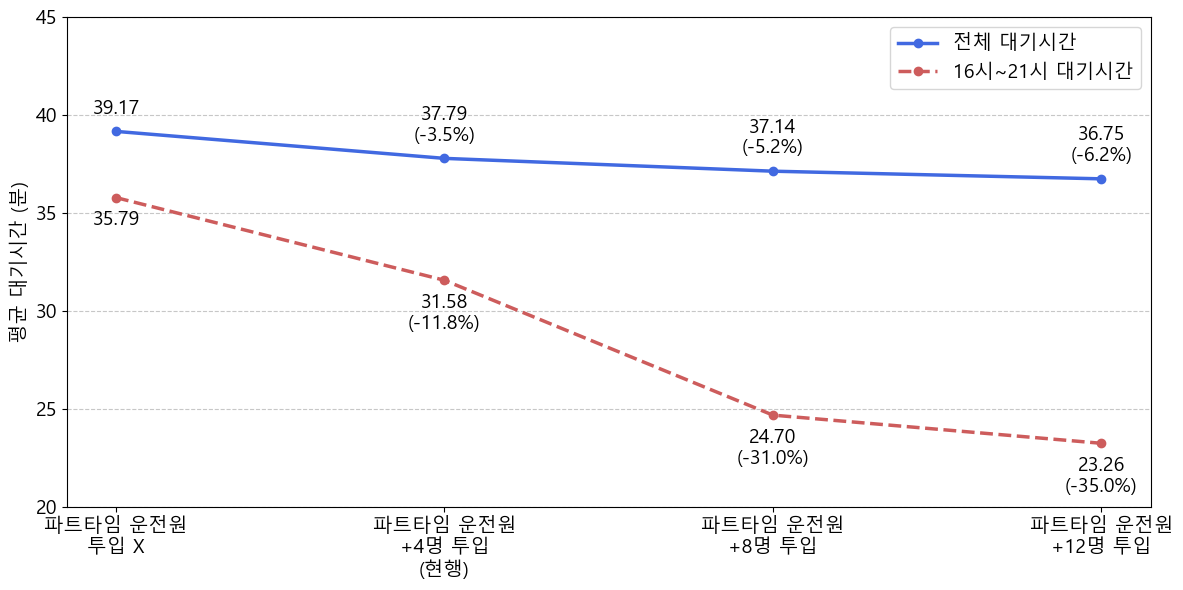

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 20
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# ÏÑ† ÍµµÍ∏∞ Ï°∞Ï†à
line_width = 2.5

def get_combined_df(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê Ï†ÑÏ≤òÎ¶¨Îêú DataFrameÏùÑ Î∞òÌôòÌï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """
    Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if combined_df is None:
        return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df):
    """
    16ÏãúÎ∂ÄÌÑ∞ 21ÏãúÍπåÏßÄÏùò ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if combined_df is None:
        return None
    
    combined_df['request_hour'] = combined_df['request_time'].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 16) & (combined_df['request_hour'] < 21)]
    
    if filtered_df.empty:
        print("Í≤ΩÍ≥†: 16Ïãú~21Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()


# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
overall_data = []
filtered_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
baseline_df = get_combined_df(baseline_file_list, 'baseline_demand_log')

avg_overall_baseline = calculate_overall_average(baseline_df)
avg_filtered_baseline = calculate_filtered_average(baseline_df)

if avg_overall_baseline is not None:
    overall_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X', 'average_time': avg_overall_baseline})
    filtered_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X', 'average_time': avg_filtered_baseline})

# --- 2. Ï∂îÍ∞Ä Ï∞®ÎüâÏàò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
for n_additional in (4,10,11):
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    additional_df = get_combined_df(additional_file_list, file_pattern)
    
    avg_overall_additional = calculate_overall_average(additional_df)
    avg_filtered_additional = calculate_filtered_average(additional_df)
    
    if n_additional == 4:
        n_additional_alpha = 4
    if n_additional == 10:
        n_additional_alpha = 8
    if n_additional == 11:
        n_additional_alpha = 12
        
    if avg_overall_additional is not None:
        if n_additional == 4:
            scenario_name = f'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\n+{n_additional_alpha}Î™Ö Ìà¨ÏûÖ\n(ÌòÑÌñâ)'
        else:
            scenario_name = f'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\n+{n_additional_alpha}Î™Ö Ìà¨ÏûÖ'
        
        overall_data.append({'scenario_name': scenario_name, 'average_time': avg_overall_additional})
        filtered_data.append({'scenario_name': scenario_name, 'average_time': avg_filtered_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± (ÏÑ† Í∑∏ÎûòÌîÑ) ---
if overall_data:
    df_overall = pd.DataFrame(overall_data)
    df_filtered = pd.DataFrame(filtered_data)
    
    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò Ï†ÑÏ≤¥ Î∞è ÌïÑÌÑ∞ÎßÅÎêú ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞
    baseline_overall_time = df_overall[df_overall['scenario_name'] == 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X']['average_time'].iloc[0]
    baseline_filtered_time = df_filtered[df_filtered['scenario_name'] == 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X']['average_time'].iloc[0]

    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    ax.plot(df_overall['scenario_name'], df_overall['average_time'], marker='o', linestyle='-', linewidth=line_width, color='royalblue', label='Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ')
    
    # 16~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ ÏÑ† Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
    ax.plot(df_filtered['scenario_name'], df_filtered['average_time'], marker='o', linestyle='--', linewidth=line_width, color='indianred', label='16Ïãú~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ')
    
    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    ax.set_xticklabels(df_overall['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.legend(fontsize=label_fontsize)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏ ÏúÑÏóê Í∞í Î∞è Í∞êÏÜåÏú® ÌëúÏãú
    y_offset_overall = 0.7  # Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌÖçÏä§Ìä∏Î•º ÏúÑÎ°ú Ïò¨Î¶¥ Ïò§ÌîÑÏÖã
    y_offset_filtered = -0.7 # 16~21Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌÖçÏä§Ìä∏Î•º ÏïÑÎûòÎ°ú ÎÇ¥Î¶¥ Ïò§ÌîÑÏÖã

    for index, row in df_overall.iterrows():
        text_overall = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X':
            decrease_rate = ((baseline_overall_time - row['average_time']) / baseline_overall_time) * 100
            text_overall += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_overall, text_overall, ha='center', va='bottom', fontsize=value_fontsize)

    for index, row in df_filtered.iterrows():
        text_filtered = f'{row["average_time"]:.2f}'
        if row['scenario_name'] != 'ÌååÌä∏ÌÉÄÏûÑ Ïö¥Ï†ÑÏõê\nÌà¨ÏûÖ X':
            decrease_rate = ((baseline_filtered_time - row['average_time']) / baseline_filtered_time) * 100
            text_filtered += f'\n(-{decrease_rate:.1f}%)'
        
        ax.text(index, row['average_time'] + y_offset_filtered, text_filtered, ha='center', va='top', fontsize=value_fontsize)

    plt.tight_layout()
    
    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_line_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî ÏÑ† Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v31_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v32_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v33_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v34_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v35_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v36_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v37_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v38_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v39_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\scenario_waiting_times_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1690091233.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


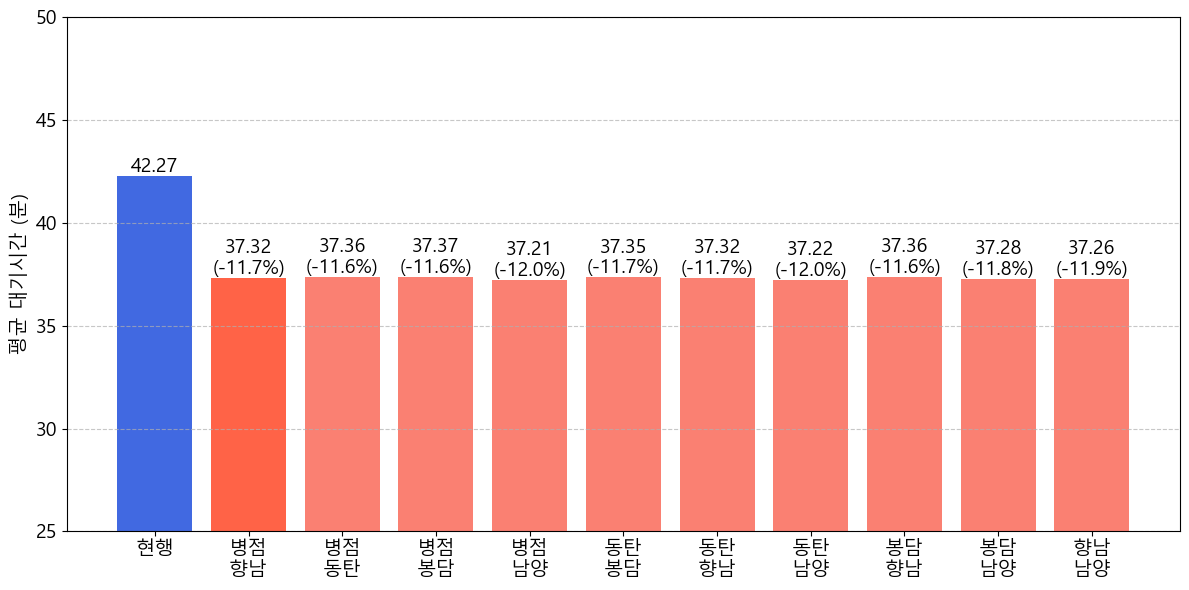

In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_scenario_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌòÑÌñâ', 'average_time': avg_baseline})

# --- 2. Ï∂îÍ∞Ä Ï∞®ÎüâÏàò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
# xÏ∂ïÏóê ÌëúÏãúÌï† ÎùºÎ≤®Í≥º ÌååÏùºÎ™ÖÏóê Ìè¨Ìï®Îêú Ïà´ÏûêÎ•º ÎîïÏÖîÎÑàÎ¶¨Î°ú Îß§Ìïë
scenario_labels = {
    1: 'Î≥ëÏ†ê\nÌñ•ÎÇ®',
    31: 'Î≥ëÏ†ê\nÎèôÌÉÑ',
    32: 'Î≥ëÏ†ê\nÎ¥âÎã¥',
    33: 'Î≥ëÏ†ê\nÎÇ®Ïñë',
    34: 'ÎèôÌÉÑ\nÎ¥âÎã¥',
    35: 'ÎèôÌÉÑ\nÌñ•ÎÇ®',
    36: 'ÎèôÌÉÑ\nÎÇ®Ïñë',
    37: 'Î¥âÎã¥\nÌñ•ÎÇ®',
    38: 'Î¥âÎã¥\nÎÇ®Ïñë',
    39: 'Ìñ•ÎÇ®\nÎÇ®Ïñë'
}

for n_additional, label in scenario_labels.items():
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_data.append({'scenario_name': label, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞
    baseline_time = df_results[df_results['scenario_name'] == 'ÌòÑÌñâ']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
    colors = []
    for name in df_results['scenario_name']:
        if name == 'ÌòÑÌñâ':
            colors.append('royalblue')
        elif name == 'Î≥ëÏ†ê\nÌñ•ÎÇ®':
            colors.append('tomato') # v1 ÏãúÎÇòÎ¶¨Ïò§Ïóê Ìï¥ÎãπÌïòÎäî ÎßâÎåÄÎ•º Ï¥àÎ°ùÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
        else:
            colors.append('salmon')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    #ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§', fontsize=label_fontsize) # xÏ∂ï ÎùºÎ≤®ÏùÑ 'ÏãúÎÇòÎ¶¨Ïò§'Î°ú Î≥ÄÍ≤Ω
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï (ÏûêÎèôÏúºÎ°ú ÏßÄÏ†ïÎêú Ïù¥Î¶Ñ ÏÇ¨Ïö©)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Í∞êÏÜåÏú® ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îäî Í∞êÏÜåÏú®ÏùÑ ÌëúÏãúÌïòÏßÄ ÏïäÏùå
        if scenario_name == 'ÌòÑÌñâ':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v31_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v32_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v33_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v34_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v35_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v36_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v37_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v38_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v39_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2757661525.py:118: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\scenario_waiting_times_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


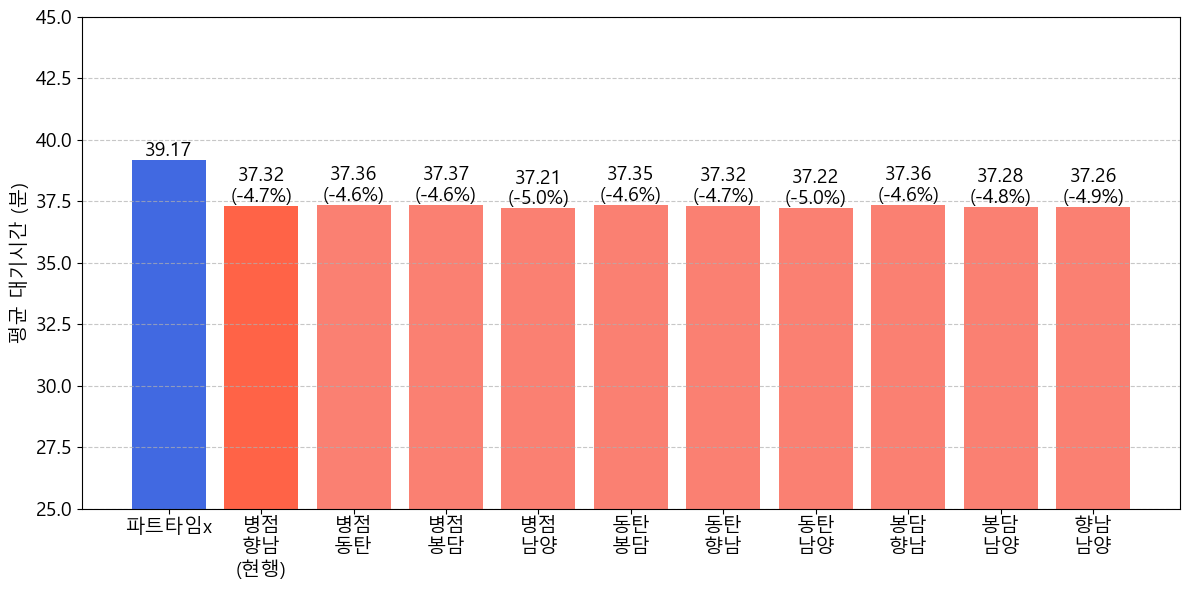

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑx', 'average_time': avg_baseline})

# --- 2. Ï∂îÍ∞Ä Ï∞®ÎüâÏàò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
# xÏ∂ïÏóê ÌëúÏãúÌï† ÎùºÎ≤®Í≥º ÌååÏùºÎ™ÖÏóê Ìè¨Ìï®Îêú Ïà´ÏûêÎ•º ÎîïÏÖîÎÑàÎ¶¨Î°ú Îß§Ìïë
scenario_labels = {
    1: 'Î≥ëÏ†ê\nÌñ•ÎÇ®\n(ÌòÑÌñâ)',
    31: 'Î≥ëÏ†ê\nÎèôÌÉÑ',
    32: 'Î≥ëÏ†ê\nÎ¥âÎã¥',
    33: 'Î≥ëÏ†ê\nÎÇ®Ïñë',
    34: 'ÎèôÌÉÑ\nÎ¥âÎã¥',
    35: 'ÎèôÌÉÑ\nÌñ•ÎÇ®',
    36: 'ÎèôÌÉÑ\nÎÇ®Ïñë',
    37: 'Î¥âÎã¥\nÌñ•ÎÇ®',
    38: 'Î¥âÎã¥\nÎÇ®Ïñë',
    39: 'Ìñ•ÎÇ®\nÎÇ®Ïñë'
}

for n_additional, label in scenario_labels.items():
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_data.append({'scenario_name': label, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞
    baseline_time = df_results[df_results['scenario_name'] == 'ÌååÌä∏ÌÉÄÏûÑx']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
    colors = []
    for name in df_results['scenario_name']:
        if name == 'ÌååÌä∏ÌÉÄÏûÑx':
            colors.append('royalblue')
        elif name == 'Î≥ëÏ†ê\nÌñ•ÎÇ®\n(ÌòÑÌñâ)':
            colors.append('tomato') # v1 ÏãúÎÇòÎ¶¨Ïò§Ïóê Ìï¥ÎãπÌïòÎäî ÎßâÎåÄÎ•º Ï¥àÎ°ùÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
        else:
            colors.append('salmon')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    #ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§', fontsize=label_fontsize) # xÏ∂ï ÎùºÎ≤®ÏùÑ 'ÏãúÎÇòÎ¶¨Ïò§'Î°ú Î≥ÄÍ≤Ω
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï (ÏûêÎèôÏúºÎ°ú ÏßÄÏ†ïÎêú Ïù¥Î¶Ñ ÏÇ¨Ïö©)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Í∞êÏÜåÏú® ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îäî Í∞êÏÜåÏú®ÏùÑ ÌëúÏãúÌïòÏßÄ ÏïäÏùå
        if scenario_name == 'ÌååÌä∏ÌÉÄÏûÑx':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v1_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v41_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v42_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v43_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v44_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])


'scheduled_increase_scenario_v45_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 30Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\scenario_waiting_times_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3692280226.py:114: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


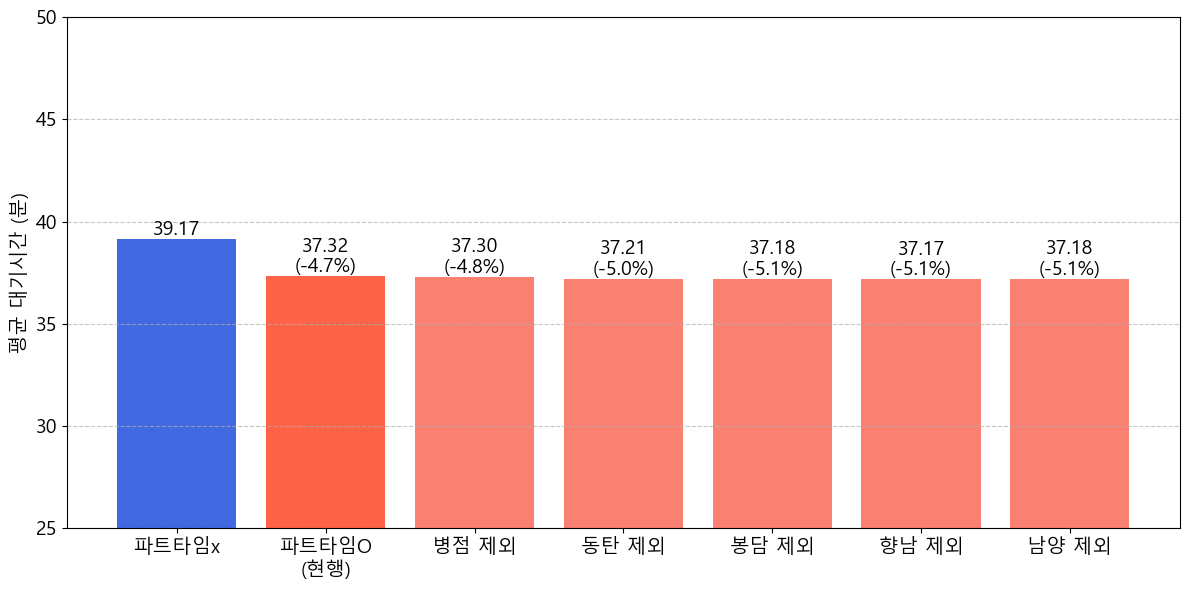

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df['request_time'] = pd.to_datetime(combined_df['request_time'])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df['request_time']).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌååÌä∏ÌÉÄÏûÑx', 'average_time': avg_baseline})

# --- 2. Ï∂îÍ∞Ä Ï∞®ÎüâÏàò ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
# xÏ∂ïÏóê ÌëúÏãúÌï† ÎùºÎ≤®Í≥º ÌååÏùºÎ™ÖÏóê Ìè¨Ìï®Îêú Ïà´ÏûêÎ•º ÎîïÏÖîÎÑàÎ¶¨Î°ú Îß§Ìïë
scenario_labels = {
    1: 'ÌååÌä∏ÌÉÄÏûÑO\n(ÌòÑÌñâ)',
    41: 'Î≥ëÏ†ê Ï†úÏô∏',
    42: 'ÎèôÌÉÑ Ï†úÏô∏',
    43: 'Î¥âÎã¥ Ï†úÏô∏',
    44: 'Ìñ•ÎÇ® Ï†úÏô∏',
    45: 'ÎÇ®Ïñë Ï†úÏô∏'
}

for n_additional, label in scenario_labels.items():
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'scheduled_increase_scenario_v{n_additional}_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern)
    
    if avg_additional is not None:
        scenario_data.append({'scenario_name': label, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Í∞êÏÜåÏú® Í≥ÑÏÇ∞
    baseline_time = df_results[df_results['scenario_name'] == 'ÌååÌä∏ÌÉÄÏûÑx']['average_time'].iloc[0]
    df_results['decrease_rate'] = ((baseline_time - df_results['average_time']) / baseline_time) * 100

    # Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
    colors = []
    for name in df_results['scenario_name']:
        if name == 'ÌååÌä∏ÌÉÄÏûÑx':
            colors.append('royalblue')
        elif name == 'ÌååÌä∏ÌÉÄÏûÑO\n(ÌòÑÌñâ)':
            colors.append('tomato') # v1 ÏãúÎÇòÎ¶¨Ïò§Ïóê Ìï¥ÎãπÌïòÎäî ÎßâÎåÄÎ•º Ï¥àÎ°ùÏÉâÏúºÎ°ú Î≥ÄÍ≤Ω
        else:
            colors.append('salmon')

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    #ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§', fontsize=label_fontsize) # xÏ∂ï ÎùºÎ≤®ÏùÑ 'ÏãúÎÇòÎ¶¨Ïò§'Î°ú Î≥ÄÍ≤Ω
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï (ÏûêÎèôÏúºÎ°ú ÏßÄÏ†ïÎêú Ïù¥Î¶Ñ ÏÇ¨Ïö©)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Í∞êÏÜåÏú® ÌëúÏãú
    for bar in bars:
        height = bar.get_height()
        scenario_name = df_results.loc[df_results['average_time'] == height, 'scenario_name'].iloc[0]
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îäî Í∞êÏÜåÏú®ÏùÑ ÌëúÏãúÌïòÏßÄ ÏïäÏùå
        if scenario_name == 'ÌååÌä∏ÌÉÄÏûÑx':
            text = f'{height:.2f}'
        else:
            decrease_rate = df_results.loc[df_results['average_time'] == height, 'decrease_rate'].iloc[0]
            text = f'{height:.2f}\n(-{decrease_rate:.1f}%)'
        
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'scenario_waiting_times_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ï§ë...


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60


ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 27.75Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 70.24Î∂Ñ


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1932196653.py:46: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60


Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ x ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 35.03Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 38.10Î∂Ñ

------------------------------------------------------
Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\baseline_vs_universal_inout_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


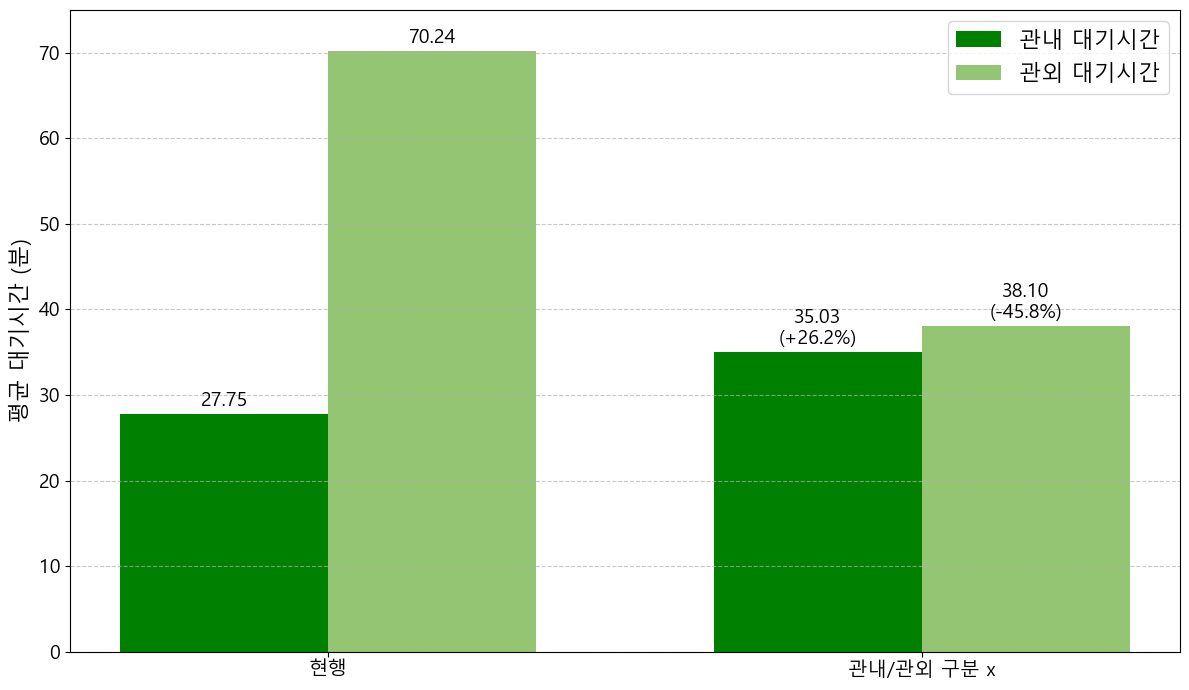

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
y_min = 0
y_max = 75
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.35

# ==========================================================
# üìä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞òÏúºÎ°ú ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
# ==========================================================
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ï§ë...")

def calculate_waiting_time(file_list, scenario_name):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùÑ Í∏∞Î∞òÏúºÎ°ú Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"Ïò§Î•ò: '{scenario_name}' ÏãúÎÇòÎ¶¨Ïò§Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return None, None
    
    try:
        df_list = [pd.read_csv(f, encoding='utf-8') for f in file_list]
        combined_df = pd.concat(df_list, ignore_index=True)
        
        # Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ Î°úÏßÅ: 'pickup_depot_name'Í≥º 'dropoff_depot_name'ÏùÑ ÏÇ¨Ïö©
        combined_df['new_in_out'] = 'Í¥ÄÏô∏'
        combined_df.loc[(combined_df['pickup_depot_name'].notna()) & (combined_df['dropoff_depot_name'].notna()), 'new_in_out'] = 'Í¥ÄÎÇ¥'
        
        # ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ÏôÄ ÎèôÏùºÌïú Î∞©Ïãù)
        combined_df['waiting_time'] = (pd.to_datetime(combined_df['pickup_time']) - pd.to_datetime(combined_df['request_time'])).dt.total_seconds() / 60
        
        avg_in = combined_df[combined_df['new_in_out'] == 'Í¥ÄÎÇ¥']['waiting_time'].mean()
        avg_out = combined_df[combined_df['new_in_out'] == 'Í¥ÄÏô∏']['waiting_time'].mean()
        
        print(f"{scenario_name} ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = {avg_in:.2f}Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = {avg_out:.2f}Î∂Ñ")
        return avg_in, avg_out

    except Exception as e:
        print(f"'{scenario_name}' ÏãúÎÇòÎ¶¨Ïò§ ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        return None, None

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Î≤îÏö©Í≥º ÎèôÏùºÌïú Î∞©Ïãù Ï†ÅÏö©) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline_in, avg_baseline_out = calculate_waiting_time(baseline_file_list, 'ÌòÑÌñâ')

# --- Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
universal_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_forceBOTH_202506*.csv'))
avg_universal_in, avg_universal_out = calculate_waiting_time(universal_file_list, 'Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ x')
    
# ==========================================================

# --- 1. Í∑∏ÎûòÌîÑ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
scenario_data_list = []

if avg_baseline_in is not None and avg_baseline_out is not None:
    scenario_data_list.append({'scenario_name': 'ÌòÑÌñâ', 'Í¥ÄÎÇ¥': avg_baseline_in, 'Í¥ÄÏô∏': avg_baseline_out})

if avg_universal_in is not None and avg_universal_out is not None:
    scenario_data_list.append({'scenario_name': 'Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ x', 'Í¥ÄÎÇ¥': avg_universal_in, 'Í¥ÄÏô∏': avg_universal_out})

# --- 2. ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data_list:
    df_results = pd.DataFrame(scenario_data_list)
    x = np.arange(len(df_results))
    fig, ax = plt.subplots(figsize=(12, 7))
    
    rects1 = ax.bar(x - bar_width/2, df_results['Í¥ÄÎÇ¥'], bar_width, label='Í¥ÄÎÇ¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color='green')
    rects2 = ax.bar(x + bar_width/2, df_results['Í¥ÄÏô∏'], bar_width, label='Í¥ÄÏô∏ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color='#93C572')

    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    def autolabel_with_percentage(rects, scenario_type):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            text_to_display = f'{height:.2f}'

            if 'ÌòÑÌñâ' in df_results['scenario_name'].values:
                baseline_row = df_results[df_results['scenario_name'] == 'ÌòÑÌñâ'].iloc[0]
                
                if scenario_type == 'Í¥ÄÎÇ¥' and df_results['scenario_name'].iloc[i] != 'ÌòÑÌñâ':
                    baseline_val = baseline_row['Í¥ÄÎÇ¥']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'

                elif scenario_type == 'Í¥ÄÏô∏' and df_results['scenario_name'].iloc[i] != 'ÌòÑÌñâ':
                    baseline_val = baseline_row['Í¥ÄÏô∏']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'
            
            ax.annotate(text_to_display,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=value_fontsize)

    autolabel_with_percentage(rects1, 'Í¥ÄÎÇ¥')
    autolabel_with_percentage(rects2, 'Í¥ÄÏô∏')
    
    ax.legend(fontsize=label_fontsize)
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'baseline_vs_universal_inout_comparison.png')
    plt.savefig(plot_path)
    
    print("\n------------------------------------------------------")
    print(f"Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ï§ë...


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3746921068.py:33: DtypeWarning: Columns (4,10,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_baseline = pd.read_csv(dispatch_log_path, encoding='utf-8')
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3746921068.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_universal['waiting_time'] = (pd.to_datetime(df_universal['pickup_time']) - pd.to_datetime(df_universal['request_time'])).dt.total_seconds() / 60


ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 32.58Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 62.41Î∂Ñ


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3746921068.py:69: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_universal['waiting_time'] = (pd.to_datetime(df_universal['pickup_time']) - pd.to_datetime(df_universal['request_time'])).dt.total_seconds() / 60


Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 35.03Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = 38.10Î∂Ñ

------------------------------------------------------
Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\baseline_vs_universal_inout_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


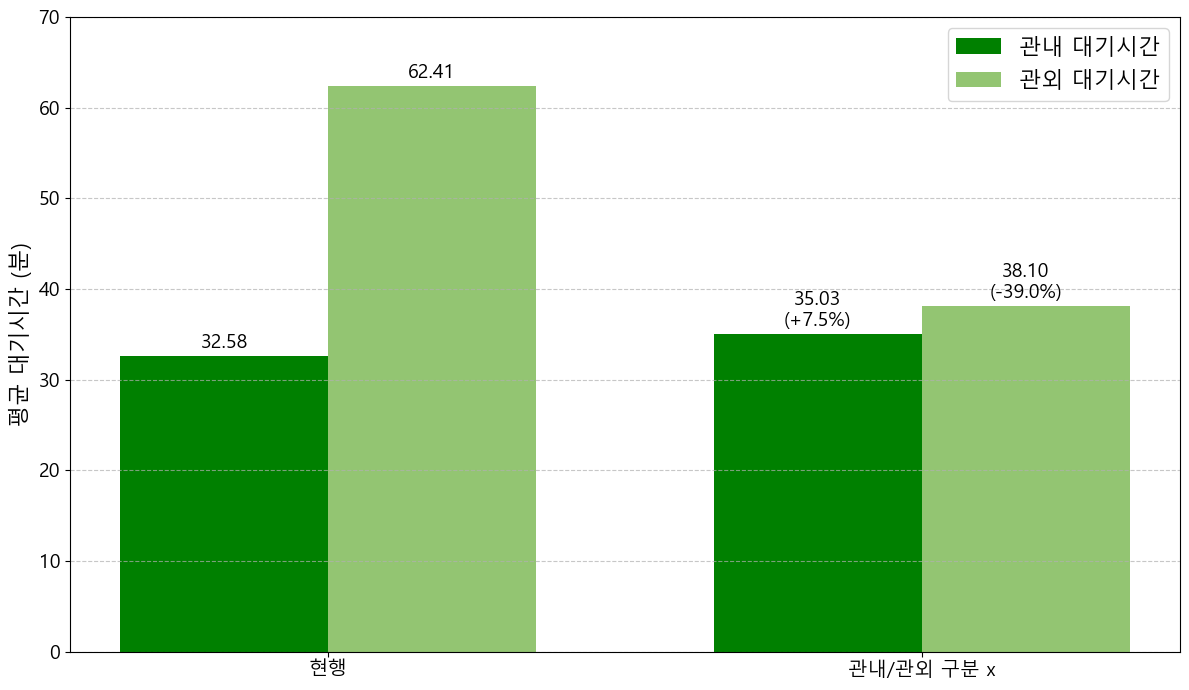

In [390]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import re

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'
dispatch_log_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/data/merged_dispatch_log_202506.csv'
universal_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_forceBOTH_202506*.csv'))

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
y_min = 0
y_max = 70
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14
bar_width = 0.35

# ==========================================================
# üìä Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Í∏∞Î∞òÏúºÎ°ú ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
# ==========================================================
print("Îç∞Ïù¥ÌÑ∞ Î°úÎî© Î∞è ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ Ï§ë...")

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
try:
    df_baseline = pd.read_csv(dispatch_log_path, encoding='utf-8')
    
    # 'mode' Ïª¨ÎüºÏù¥ 'ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®'Ïù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
    df_baseline = df_baseline[df_baseline['mode'] == 'ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®']
    df_baseline = df_baseline[df_baseline['type'] == 'Ï¶âÏãú']

    # ÏÉàÎ°úÏö¥ Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ Î°úÏßÅ Ï†ÅÏö©
    df_baseline['new_in_out'] = 'Í¥ÄÏô∏'
    df_baseline.loc[(df_baseline['origin1'].str.contains('Í≤ΩÍ∏∞ÎèÑ ÌôîÏÑ±Ïãú', na=False)) & (df_baseline['destination1'].str.contains('Í≤ΩÍ∏∞ÎèÑ ÌôîÏÑ±Ïãú', na=False)), 'new_in_out'] = 'Í¥ÄÎÇ¥'
    
    df_baseline['waiting_time'] = (pd.to_datetime(df_baseline['boarding_time']) - pd.to_datetime(df_baseline['receipt_time'])).dt.total_seconds() / 60
    
    avg_baseline_in = df_baseline[df_baseline['new_in_out'] == 'Í¥ÄÎÇ¥']['waiting_time'].mean()
    avg_baseline_out = df_baseline[df_baseline['new_in_out'] == 'Í¥ÄÏô∏']['waiting_time'].mean()
    print(f"ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = {avg_baseline_in:.2f}Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = {avg_baseline_out:.2f}Î∂Ñ")

except FileNotFoundError:
    print(f"Ïò§Î•ò: ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ ÌååÏùº '{dispatch_log_path}'ÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
    avg_baseline_in, avg_baseline_out = None, None
except Exception as e:
    print(f"ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
    print("Ïò§Î•ò ÏÉÅÏÑ∏:", e)
    avg_baseline_in, avg_baseline_out = None, None

# --- Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ ---
avg_universal_in, avg_universal_out = None, None
if universal_file_list:
    try:
        df_universal_list = [pd.read_csv(f, encoding='utf-8') for f in universal_file_list]
        df_universal = pd.concat(df_universal_list, ignore_index=True)
        
        # ÏÉàÎ°úÏö¥ Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ Î°úÏßÅ: 'pickup_depot_name'Í≥º 'dropoff_depot_name'ÏùÑ ÏÇ¨Ïö©
        # Îëê Ïª¨ÎüºÏóê Î™®Îëê Í∞íÏù¥ ÏûàÏúºÎ©¥ 'Í¥ÄÎÇ¥', ÌïòÎÇòÎßå ÏûàÏúºÎ©¥ 'Í¥ÄÏô∏'
        df_universal['new_in_out'] = 'Í¥ÄÏô∏'
        df_universal.loc[(df_universal['pickup_depot_name'].notna()) & (df_universal['dropoff_depot_name'].notna()), 'new_in_out'] = 'Í¥ÄÎÇ¥'
        
        df_universal['waiting_time'] = (pd.to_datetime(df_universal['pickup_time']) - pd.to_datetime(df_universal['request_time'])).dt.total_seconds() / 60
        
        # ÏÉàÎ°úÏö¥ Íµ¨Î∂Ñ Í∏∞Ï§Ä('new_in_out')ÏúºÎ°ú ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
        avg_universal_in = df_universal[df_universal['new_in_out'] == 'Í¥ÄÎÇ¥']['waiting_time'].mean()
        avg_universal_out = df_universal[df_universal['new_in_out'] == 'Í¥ÄÏô∏']['waiting_time'].mean()
        print(f"Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§: Í¥ÄÎÇ¥ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = {avg_universal_in:.2f}Î∂Ñ, Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ = {avg_universal_out:.2f}Î∂Ñ")

    except Exception as e:
        print(f"Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÌååÏùº Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")
        print("Ïò§Î•ò ÏÉÅÏÑ∏:", e)
else:
    print("Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÌååÏùºÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§. (universal_simple_demand_log_202506*.csv)")
    
# ==========================================================

# --- 1. Í∑∏ÎûòÌîÑ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ ---
scenario_data_list = []

if avg_baseline_in is not None and avg_baseline_out is not None:
    scenario_data_list.append({'scenario_name': 'ÌòÑÌñâ', 'Í¥ÄÎÇ¥': avg_baseline_in, 'Í¥ÄÏô∏': avg_baseline_out})

if avg_universal_in is not None and avg_universal_out is not None:
    scenario_data_list.append({'scenario_name': 'Í¥ÄÎÇ¥/Í¥ÄÏô∏ Íµ¨Î∂Ñ x', 'Í¥ÄÎÇ¥': avg_universal_in, 'Í¥ÄÏô∏': avg_universal_out})

# --- 2. ÎßâÎåÄ Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data_list:
    df_results = pd.DataFrame(scenario_data_list)
    x = np.arange(len(df_results))
    fig, ax = plt.subplots(figsize=(12, 7))
    
    rects1 = ax.bar(x - bar_width/2, df_results['Í¥ÄÎÇ¥'], bar_width, label='Í¥ÄÎÇ¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color='green')
    rects2 = ax.bar(x + bar_width/2, df_results['Í¥ÄÏô∏'], bar_width, label='Í¥ÄÏô∏ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color='#93C572')

    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    def autolabel_with_percentage(rects, scenario_type):
        for i, rect in enumerate(rects):
            height = rect.get_height()
            text_to_display = f'{height:.2f}'

            # 'ÌòÑÌñâ' ÏãúÎÇòÎ¶¨Ïò§Í∞Ä Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏûàÎäîÏßÄ ÌôïÏù∏
            if 'ÌòÑÌñâ' in df_results['scenario_name'].values:
                baseline_row = df_results[df_results['scenario_name'] == 'ÌòÑÌñâ'].iloc[0]
                
                if scenario_type == 'Í¥ÄÎÇ¥' and df_results['scenario_name'].iloc[i] != 'ÌòÑÌñâ':
                    baseline_val = baseline_row['Í¥ÄÎÇ¥']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'

                elif scenario_type == 'Í¥ÄÏô∏' and df_results['scenario_name'].iloc[i] != 'ÌòÑÌñâ':
                    baseline_val = baseline_row['Í¥ÄÏô∏']
                    if baseline_val != 0:
                        percentage_change = ((height - baseline_val) / baseline_val) * 100
                        text_to_display += f'\n({percentage_change:+.1f}%)'
            
            ax.annotate(text_to_display,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=value_fontsize)

    autolabel_with_percentage(rects1, 'Í¥ÄÎÇ¥')
    autolabel_with_percentage(rects2, 'Í¥ÄÏô∏')
    
    ax.legend(fontsize=label_fontsize)
    plt.tight_layout()
    
    plot_path = os.path.join(folder_path, 'baseline_vs_universal_inout_comparison.png')
    plt.savefig(plot_path)
    
    print("\n------------------------------------------------------")
    print(f"Í¥ÄÎÇ¥/Í¥ÄÏô∏ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1180193609.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
'baseline_with_shift_realloc_12to11_30_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1180193609.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


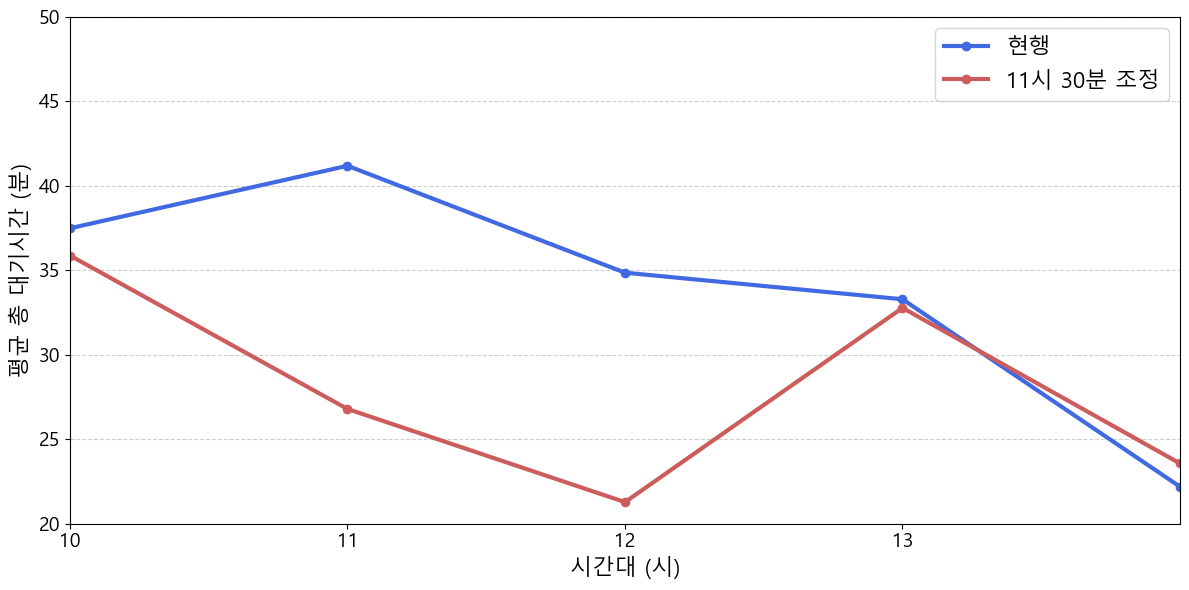

In [425]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò Ï∂îÍ∞Ä
y_min = 20 # yÏ∂ï ÏµúÏÜåÍ∞í
y_max = 50 # yÏ∂ï ÏµúÎåÄÍ∞í

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutesÏôÄ call_waiting_timeÏùÑ Íµ¨Î∂ÑÌïòÏó¨ Ï≤òÎ¶¨
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'call_waiting_time' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes Í≥ÑÏÇ∞
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_realloc_12to11_30_40pct_202506*.csv', folder_path, 'request_time')

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌòÑÌñâ', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='11Ïãú 30Î∂Ñ Ï°∞Ï†ï', color='indianred', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    ax.set_xlim(10, 14)
    ax.set_xticks(range(10, 14))
    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---

    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    ax.set_ylim(y_min, y_max)
    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    
    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_20pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_60pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_80pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_realloc_12to12_30_100pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\region_analysis_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3657838150.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


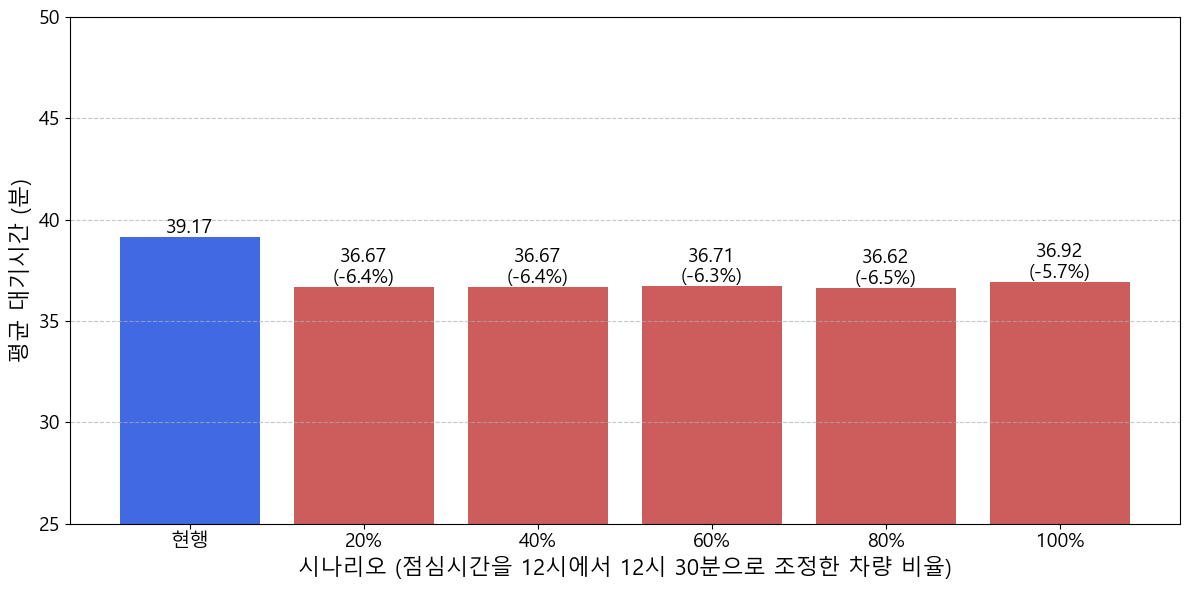

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (request_time ÏÇ¨Ïö©) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌòÑÌñâ', 'average_time': avg_baseline})

# --- 2. ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (call_time ÏÇ¨Ïö©) ---
for n_pct in range(20, 101, 20):
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'baseline_with_shift_realloc_12to12_30_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îßå Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÏßÄÏ†ï
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§ (Ï†êÏã¨ÏãúÍ∞ÑÏùÑ 12ÏãúÏóêÏÑú 12Ïãú 30Î∂ÑÏúºÎ°ú Ï°∞Ï†ïÌïú Ï∞®Îüâ ÎπÑÏú®)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Ï¶ùÍ∞ê ÎπÑÏú® ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Í∞Ä ÏïÑÎãàÎ©¥ Ï¶ùÍ∞ê ÎπÑÏú® Í≥ÑÏÇ∞
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1597303712.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
'baseline_with_shift_realloc_12to12_30_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1597303712.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


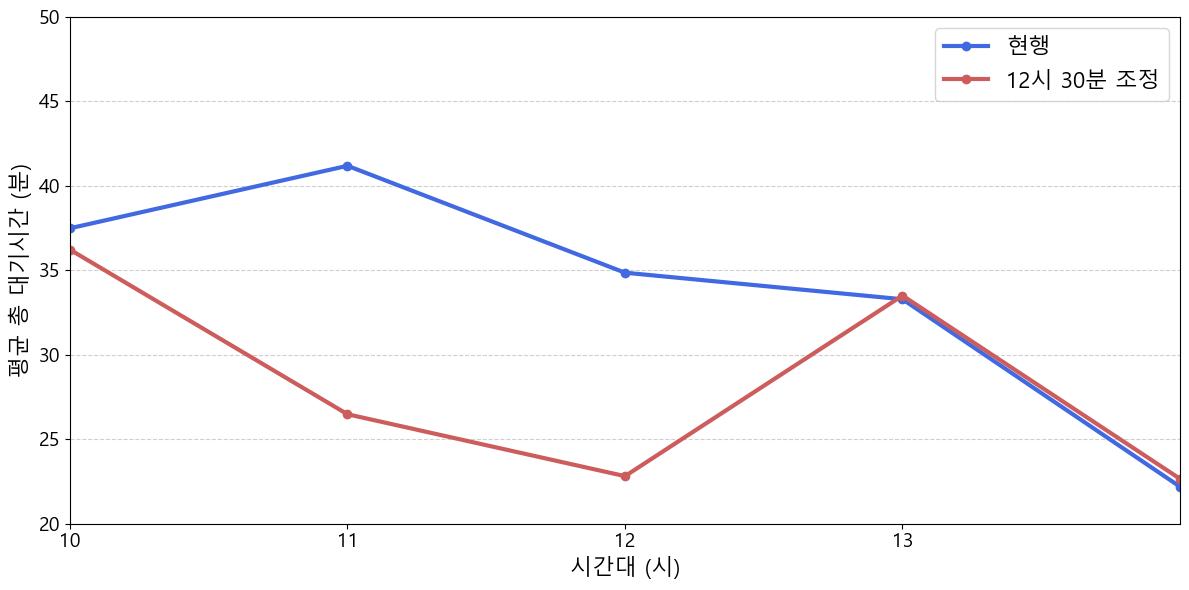

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò Ï∂îÍ∞Ä
y_min = 20 # yÏ∂ï ÏµúÏÜåÍ∞í
y_max = 50 # yÏ∂ï ÏµúÎåÄÍ∞í

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutesÏôÄ call_waiting_timeÏùÑ Íµ¨Î∂ÑÌïòÏó¨ Ï≤òÎ¶¨
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'call_waiting_time' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes Í≥ÑÏÇ∞
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_realloc_12to12_30_40pct_202506*.csv', folder_path, 'request_time')

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌòÑÌñâ', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='12Ïãú 30Î∂Ñ Ï°∞Ï†ï', color='indianred', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    ax.set_xlim(10, 14)
    ax.set_xticks(range(10, 14))
    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---

    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    ax.set_ylim(y_min, y_max)
    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    
    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_20pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_60pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_80pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_8to7_100pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\region_analysis_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1622714308.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


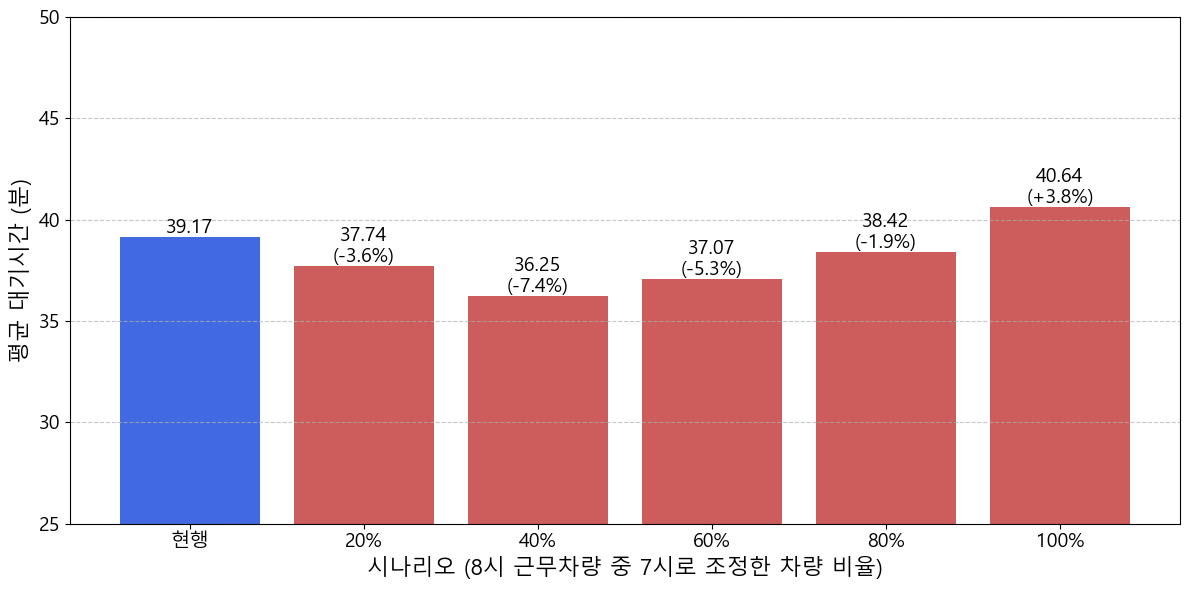

In [408]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (request_time ÏÇ¨Ïö©) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌòÑÌñâ', 'average_time': avg_baseline})

# --- 2. ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (call_time ÏÇ¨Ïö©) ---
for n_pct in range(20, 101, 20):
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'baseline_with_shift_8to7_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îßå Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÏßÄÏ†ï
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§ (8Ïãú Í∑ºÎ¨¥Ï∞®Îüâ Ï§ë 7ÏãúÎ°ú Ï°∞Ï†ïÌïú Ï∞®Îüâ ÎπÑÏú®)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Ï¶ùÍ∞ê ÎπÑÏú® ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Í∞Ä ÏïÑÎãàÎ©¥ Ï¶ùÍ∞ê ÎπÑÏú® Í≥ÑÏÇ∞
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\793794398.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
'baseline_with_shift_8to7_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\793794398.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


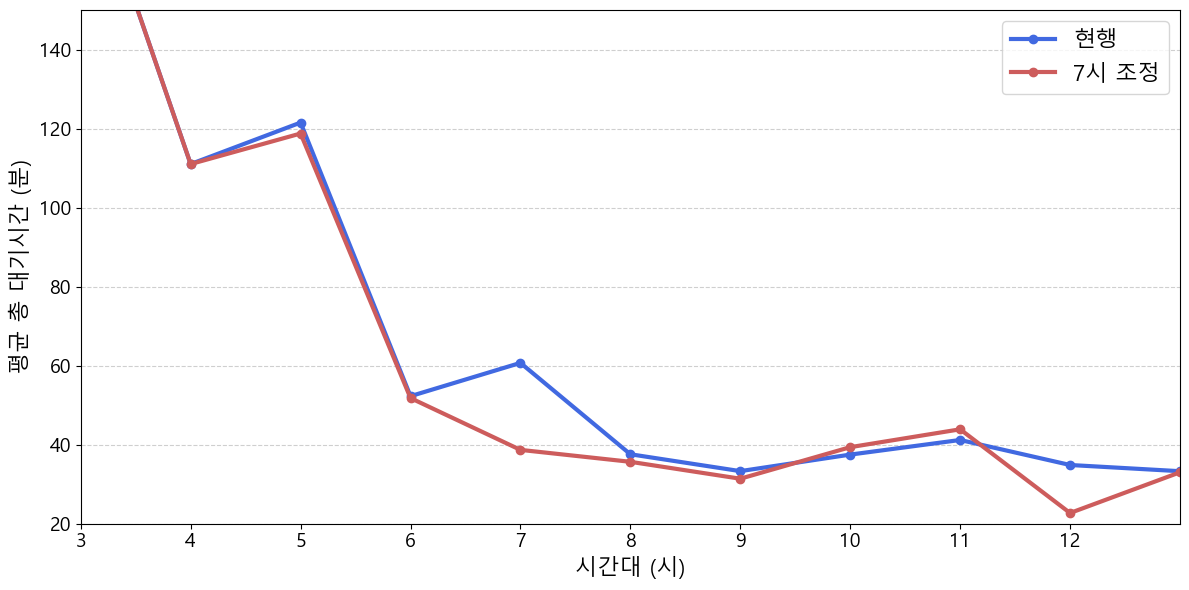

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò Ï∂îÍ∞Ä
y_min = 20 # yÏ∂ï ÏµúÏÜåÍ∞í
y_max = 150 # yÏ∂ï ÏµúÎåÄÍ∞í

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutesÏôÄ call_waiting_timeÏùÑ Íµ¨Î∂ÑÌïòÏó¨ Ï≤òÎ¶¨
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'call_waiting_time' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes Í≥ÑÏÇ∞
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_8to7_40pct_202506*.csv', folder_path, 'request_time')

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌòÑÌñâ', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='7Ïãú Ï°∞Ï†ï', color='indianred', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    ax.set_xlim(3, 13)
    ax.set_xticks(range(3, 13))
    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---

    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    ax.set_ylim(y_min, y_max)
    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    
    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_20pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_60pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_80pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to5_100pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\region_analysis_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\3180173834.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


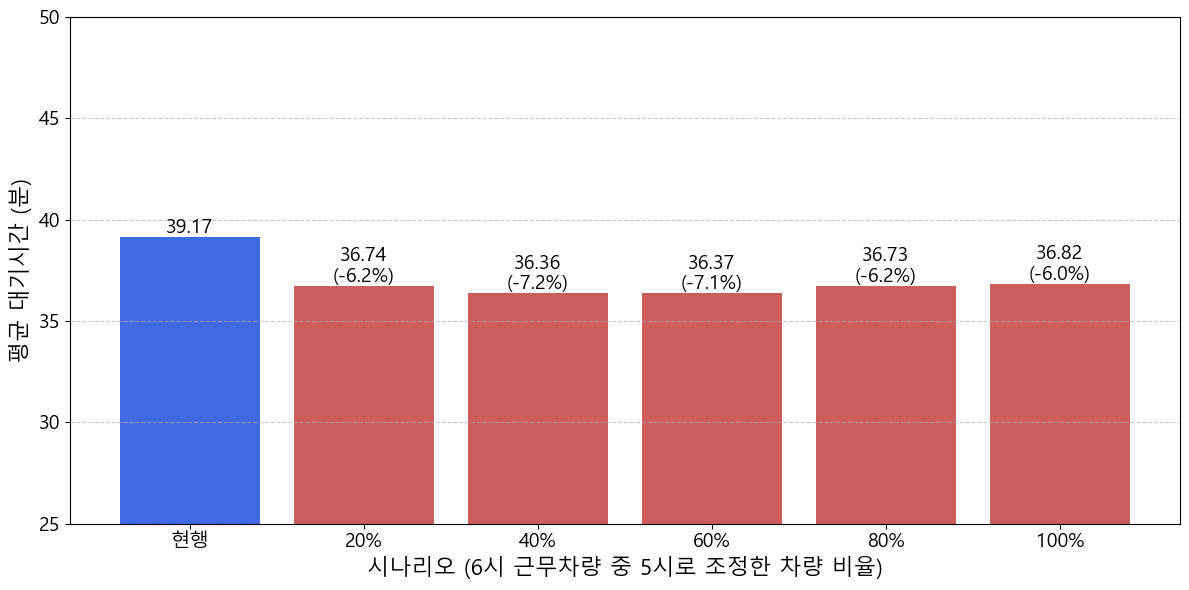

In [400]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (request_time ÏÇ¨Ïö©) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌòÑÌñâ', 'average_time': avg_baseline})

# --- 2. ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (call_time ÏÇ¨Ïö©) ---
for n_pct in range(20, 101, 20):
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'baseline_with_shift_6to5_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îßå Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÏßÄÏ†ï
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§ (6Ïãú Í∑ºÎ¨¥Ï∞®Îüâ Ï§ë 5ÏãúÎ°ú Ï°∞Ï†ïÌïú Ï∞®Îüâ ÎπÑÏú®)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Ï¶ùÍ∞ê ÎπÑÏú® ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Í∞Ä ÏïÑÎãàÎ©¥ Ï¶ùÍ∞ê ÎπÑÏú® Í≥ÑÏÇ∞
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1293054873.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
'baseline_with_shift_6to5_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1293054873.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


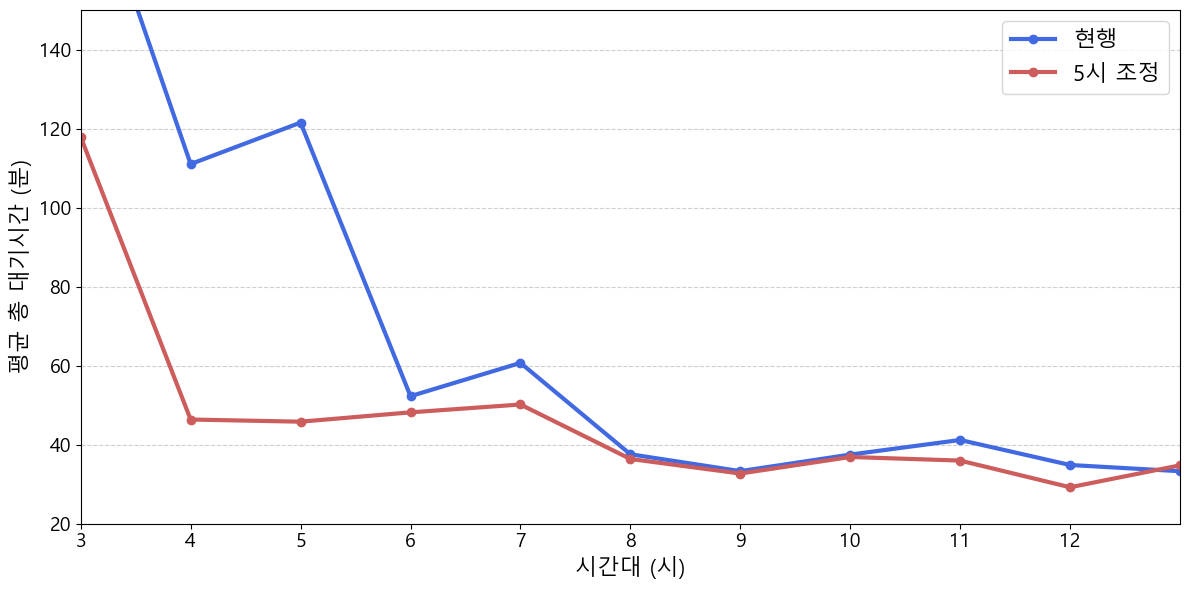

In [405]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò Ï∂îÍ∞Ä
y_min = 20 # yÏ∂ï ÏµúÏÜåÍ∞í
y_max = 150 # yÏ∂ï ÏµúÎåÄÍ∞í

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutesÏôÄ call_waiting_timeÏùÑ Íµ¨Î∂ÑÌïòÏó¨ Ï≤òÎ¶¨
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'call_waiting_time' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes Í≥ÑÏÇ∞
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_6to5_40pct_202506*.csv', folder_path, 'request_time')

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌòÑÌñâ', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='5Ïãú Ï°∞Ï†ï', color='indianred', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    ax.set_xlim(3, 13)
    ax.set_xticks(range(3, 13))
    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---

    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    ax.set_ylim(y_min, y_max)
    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    
    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_demand_log' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_20pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_40pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_60pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_80pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


'baseline_with_shift_6to4_100pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.



C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])



------------------------------------------------------
ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\region_analysis_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\1879284062.py:94: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)


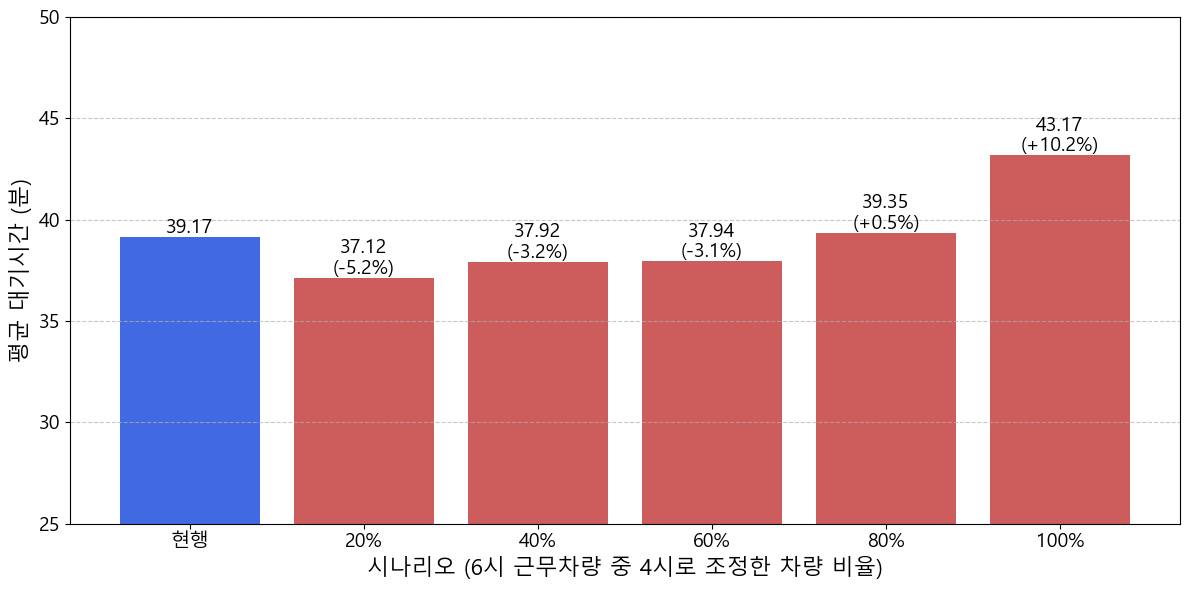

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 14

def calculate_group_average(file_list, group_name, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None

    print(f"'{group_name}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.\n")
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)

    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    average_waiting_time = combined_df['calculated_waiting_minutes'].mean()
    
    return average_waiting_time

# --- Í∞Å ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏ ---
scenario_data = []

# --- 1. ÌòÑÌñâ(baseline) ÏãúÎÇòÎ¶¨Ïò§ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (request_time ÏÇ¨Ïö©) ---
baseline_file_list = glob.glob(os.path.join(folder_path, 'baseline_with_shift_202506*.csv'))
avg_baseline = calculate_group_average(baseline_file_list, 'baseline_demand_log', 'request_time')
if avg_baseline is not None:
    scenario_data.append({'scenario_name': 'ÌòÑÌñâ', 'average_time': avg_baseline})

# --- 2. ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞ (call_time ÏÇ¨Ïö©) ---
for n_pct in range(20, 101, 20):
    
    # ÌååÏùº Ìå®ÌÑ¥ ÏÉùÏÑ±
    file_pattern = f'baseline_with_shift_6to4_{n_pct}pct_202506*.csv'
    additional_file_list = glob.glob(os.path.join(folder_path, file_pattern))
    
    # ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ Í≥ÑÏÇ∞
    avg_additional = calculate_group_average(additional_file_list, file_pattern, 'request_time')
    
    if avg_additional is not None:
        scenario_name = f'{n_pct}%'
        scenario_data.append({'scenario_name': scenario_name, 'average_time': avg_additional})

# --- ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if scenario_data:
    df_results = pd.DataFrame(scenario_data)

    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Îßå Îã§Î•∏ ÏÉâÏÉÅÏúºÎ°ú ÏßÄÏ†ï
    colors = ['royalblue'] + ['indianred'] * (len(df_results) - 1)

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(df_results['scenario_name'], df_results['average_time'], color=colors)

    #ax.set_title('ÏßÄÏó≠ Î∂ÑÏÑù ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÎÇòÎ¶¨Ïò§ (6Ïãú Í∑ºÎ¨¥Ï∞®Îüâ Ï§ë 4ÏãúÎ°ú Ï°∞Ï†ïÌïú Ï∞®Îüâ ÎπÑÏú®)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    
    # xÏ∂ï ÎùºÎ≤® ÏàòÏ†ï
    ax.set_xticklabels(df_results['scenario_name'], rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)
    
    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Ï¶ùÍ∞ê ÎπÑÏú® ÌëúÏãú
    for i, bar in enumerate(bars):
        height = bar.get_height()
        
        # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Í∞Ä ÏïÑÎãàÎ©¥ Ï¶ùÍ∞ê ÎπÑÏú® Í≥ÑÏÇ∞
        if i > 0 and avg_baseline is not None:
            percentage_change = ((height - avg_baseline) / avg_baseline) * 100
            text_to_display = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text_to_display = f'{height:.2f}'
            
        ax.text(bar.get_x() + bar.get_width()/2., height, text_to_display, 
                ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'region_analysis_comparison.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ ÎπÑÍµêÌïòÎäî Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

'baseline_with_shift_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2481535192.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
'baseline_with_shift_6to4_20pct_202506*.csv' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù 60Í∞ú.


C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2481535192.py:47: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])


info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

------------------------------------------------------
ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\hourly_waiting_time_baseline_vs_universal_line.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


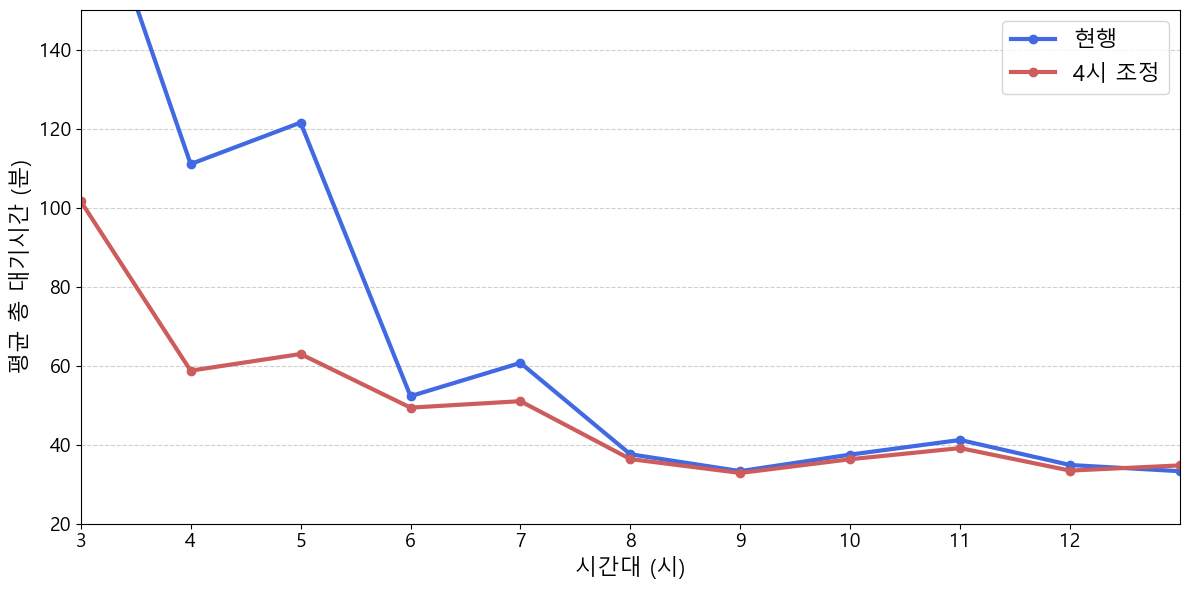

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
title_fontsize = 18
label_fontsize = 16
tick_fontsize = 14
value_fontsize = 12
line_thickness = 3 # ÏÑ† ÎëêÍªò Ï°∞Ï†à Î≥ÄÏàò

# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à Î≥ÄÏàò Ï∂îÍ∞Ä
y_min = 20 # yÏ∂ï ÏµúÏÜåÍ∞í
y_max = 150 # yÏ∂ï ÏµúÎåÄÍ∞í

def get_hourly_average(file_pattern, folder_path, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Ìå®ÌÑ¥Ïùò Î™®Îì† ÌååÏùºÏùÑ Ìï©Ï≥ê ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§.
    """
    file_list = glob.glob(os.path.join(folder_path, file_pattern))
    if not file_list:
        print(f"Ïò§Î•ò: '{file_pattern}'Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0) # Îπà Series Î∞òÌôò

    print(f"'{file_pattern}' ÌååÏùºÎì§ÏùÑ Î∂ÑÏÑù Ï§ëÏûÖÎãàÎã§. Ï¥ù {len(file_list)}Í∞ú.")
    
    dfs = []
    for file in file_list:
        try:
            df = pd.read_csv(file, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    
    # call_waiting_minutesÏôÄ call_waiting_timeÏùÑ Íµ¨Î∂ÑÌïòÏó¨ Ï≤òÎ¶¨
    if 'call_waiting_minutes' in combined_df.columns:
        call_time_column = 'call_waiting_minutes'
        pickup_time_column = 'pickup_waiting_minutes'
        print("info: 'call_waiting_minutes' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    elif 'call_waiting_time' in combined_df.columns:
        call_time_column = 'call_waiting_time'
        pickup_time_column = 'pickup_waiting_time'
        print("info: 'call_waiting_time' Ïª¨ÎüºÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
    else:
        print(f"Ïò§Î•ò: '{file_pattern}' ÌååÏùºÏóê 'call_waiting_minutes' ÎòêÎäî 'call_waiting_time' Ïª¨ÎüºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return pd.Series(index=range(24), dtype='float64').fillna(0)

    # total_waiting_minutes Í≥ÑÏÇ∞
    combined_df['total_waiting_minutes'] = combined_df[call_time_column] + combined_df[pickup_time_column]
    
    hourly_avg = combined_df.groupby(combined_df[time_column].dt.hour)['total_waiting_minutes'].mean()
    
    return hourly_avg.reindex(range(24), fill_value=0)

# --- ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§ÏôÄ Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞ ---
baseline_hourly_avg = get_hourly_average('baseline_with_shift_202506*.csv', folder_path, 'request_time')
universal_hourly_avg = get_hourly_average('baseline_with_shift_6to4_20pct_202506*.csv', folder_path, 'request_time')

# --- Îëê ÏãúÎÇòÎ¶¨Ïò§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ìï©ÏπòÍ∏∞ ---
df_comparison = pd.DataFrame({
    'ÌòÑÌñâ': baseline_hourly_avg,
    'Î≤îÏö©': universal_hourly_avg
})

# --- Í∫æÏùÄÏÑ† Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if not df_comparison.empty:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    ax.plot(df_comparison.index, df_comparison['ÌòÑÌñâ'], marker='o', label='ÌòÑÌñâ', color='royalblue', linewidth=line_thickness)
    ax.plot(df_comparison.index, df_comparison['Î≤îÏö©'], marker='o', label='4Ïãú Ï°∞Ï†ï', color='indianred', linewidth=line_thickness)

    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---
    ax.set_xlim(3, 13)
    ax.set_xticks(range(3, 13))
    # --- XÏ∂ï Î≤îÏúÑ Î∞è ÎààÍ∏à Ï°∞Ï†à ÏΩîÎìú Ï∂îÍ∞Ä ---

    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    ax.set_ylim(y_min, y_max)
    # --- YÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï Ï∂îÍ∞Ä ---
    
    #ax.set_title('ÌòÑÌñâ vs. Î≤îÏö© ÏãúÎÇòÎ¶¨Ïò§ ÏãúÍ∞ÑÎåÄÎ≥Ñ ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_xlabel('ÏãúÍ∞ÑÎåÄ (Ïãú)', fontsize=label_fontsize)
    ax.set_ylabel('ÌèâÍ∑† Ï¥ù ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()

    # Í∑∏ÎûòÌîÑ ÌååÏùºÎ°ú Ï†ÄÏû•
    plot_path = os.path.join(folder_path, 'hourly_waiting_time_baseline_vs_universal_line.png')
    plt.savefig(plot_path)

    print("\n------------------------------------------------------")
    print(f"ÏãúÍ∞ÑÎåÄÎ≥Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÏñ¥ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2890655032.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2890655032.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\2890655032.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\App


ÏÑ±Í≥µ: Í≤∞Ìï© ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\combined_waiting_time_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


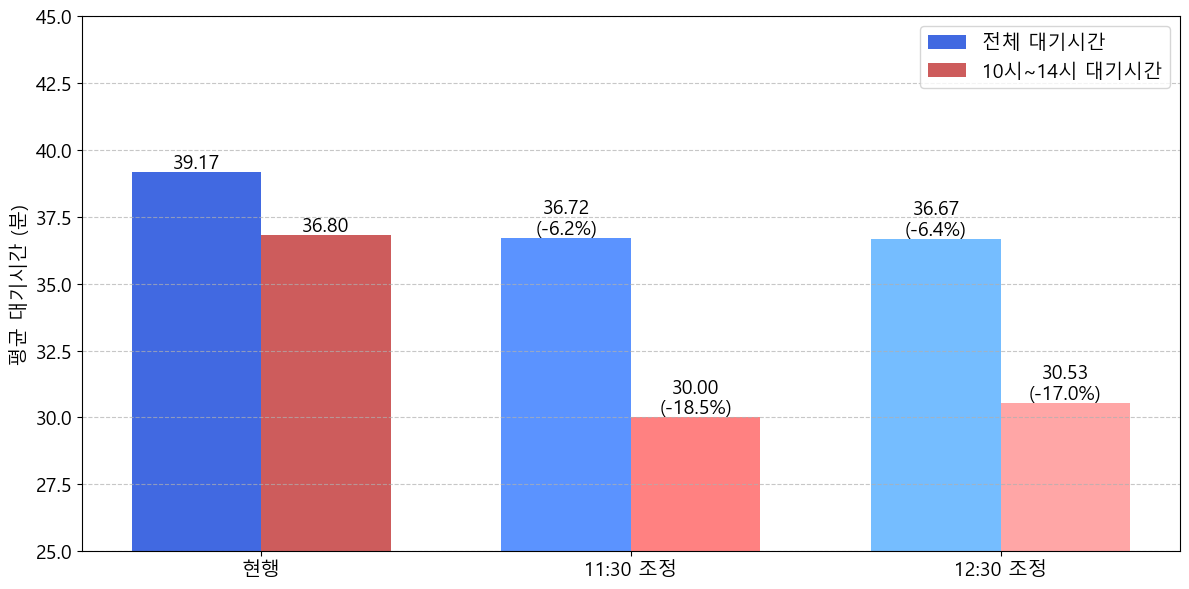

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from matplotlib.colors import to_rgb, to_hex

def adjust_lightness(color, amount):
    """
    ÏÉâÏÉÅÏùò Î∞ùÍ∏∞Î•º Ï°∞Ï†àÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
    amount > 1: Î∞ùÍ≤å, amount < 1: Ïñ¥Îë°Í≤å
    """
    try:
        c = to_rgb(color)
    except ValueError:
        return color
    c_new = [x * amount for x in c]
    # Í∞íÏù¥ 0-1 Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï°∞Ï†ï
    return to_hex([min(1, max(0, x)) for x in c_new])

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 45

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# ÎßâÎåÄ ÎÑàÎπÑ Ï°∞Ï†à (Í∏∞Î≥∏Í∞í: 0.8)
bar_width = 0.35

def get_combined_df(file_list, group_name, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê Ï†ÑÏ≤òÎ¶¨Îêú DataFrameÏùÑ Î∞òÌôòÌï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    if combined_df is None: return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df, time_column):
    """10ÏãúÎ∂ÄÌÑ∞ 14ÏãúÍπåÏßÄÏùò ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    if combined_df is None: return None
    
    combined_df['request_hour'] = combined_df[time_column].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 10) & (combined_df['request_hour'] < 14)]
    
    if filtered_df.empty:
        print("Í≤ΩÍ≥†: 10Ïãú~14Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()

# --- ÏãúÎÇòÎ¶¨Ïò§ Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò Î∞è Í≥ÑÏÇ∞ ---
scenarios = [
    {'name': 'ÌòÑÌñâ', 'pattern': 'baseline_with_shift_202506*.csv', 'time_col': 'request_time'},
    {'name': '11:30 Ï°∞Ï†ï', 'pattern': 'baseline_with_shift_realloc_12to11_30_40pct_202506*.csv', 'time_col': 'request_time'},
    {'name': '12:30 Ï°∞Ï†ï', 'pattern': 'baseline_with_shift_realloc_12to12_30_40pct_202506*.csv', 'time_col': 'request_time'}
]

overall_data = []
filtered_data = []

for scenario in scenarios:
    file_list = glob.glob(os.path.join(folder_path, scenario['pattern']))
    combined_df = get_combined_df(file_list, scenario['name'], scenario['time_col'])
    
    avg_overall = calculate_overall_average(combined_df)
    avg_filtered = calculate_filtered_average(combined_df, scenario['time_col'])
    
    overall_data.append(avg_overall)
    filtered_data.append(avg_filtered)

# --- Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if overall_data:
    scenario_names = [s['name'] for s in scenarios]
    df_results = pd.DataFrame({
        'overall': overall_data,
        'filtered': filtered_data
    }, index=scenario_names)
    
    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
    baseline_overall = df_results.loc['ÌòÑÌñâ', 'overall']
    baseline_filtered = df_results.loc['ÌòÑÌñâ', 'filtered']
    
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(scenario_names))
    
    # ÎßâÎåÄ ÏÉâÏÉÅ ÏÑ§Ï†ï: royalblue Í≥ÑÏó¥Í≥º indianred Í≥ÑÏó¥Î°ú ÌÜµÏùº
    base_overall_color = 'royalblue'
    overall_colors = [base_overall_color] + [adjust_lightness(base_overall_color, 1.4), adjust_lightness(base_overall_color, 1.8)]
    
    base_filtered_color = 'indianred'
    filtered_colors = [base_filtered_color] + [adjust_lightness(base_filtered_color, 1.4), adjust_lightness(base_filtered_color, 1.8)]
    
    # 'Ï†ÑÏ≤¥' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars1 = ax.bar(x - bar_width/2, df_results['overall'], width=bar_width, label='Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color=overall_colors)
    # '10Ïãú~14Ïãú' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars2 = ax.bar(x + bar_width/2, df_results['filtered'], width=bar_width, label='10Ïãú~14Ïãú ÎåÄÍ∏∞ÏãúÍ∞Ñ', color=filtered_colors)

    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(scenario_names, rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)

    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Ï¶ùÍ∞ê ÎπÑÏú® ÌëúÏãú
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        if scenario_names[i] != 'ÌòÑÌñâ':
            percentage_change = ((height - baseline_overall) / baseline_overall) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    for i, bar in enumerate(bars2):
        height = bar.get_height()
        if scenario_names[i] != 'ÌòÑÌñâ':
            percentage_change = ((height - baseline_filtered) / baseline_filtered) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()
    plot_path = os.path.join(folder_path, 'combined_waiting_time_comparison.png')
    plt.savefig(plot_path)

    print(f"\nÏÑ±Í≥µ: Í≤∞Ìï© ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")

C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\872603246.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\872603246.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df[time_column] = pd.to_datetime(combined_df[time_column])
C:\Users\hc_park\AppData\Local\Temp\ipykernel_41752\872603246.py:58: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
C:\Users\hc_park\AppDat


ÏÑ±Í≥µ: Í≤∞Ìï© ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä 'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results\combined_waiting_time_comparison.png'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


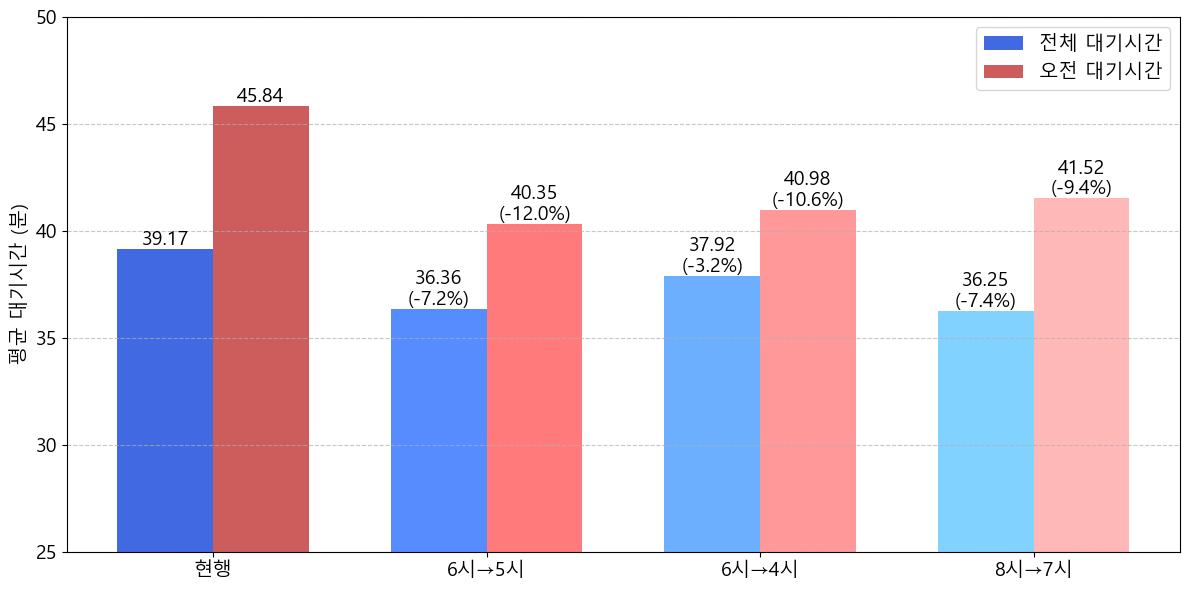

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from matplotlib.colors import to_rgb, to_hex

def adjust_lightness(color, amount):
    """
    ÏÉâÏÉÅÏùò Î∞ùÍ∏∞Î•º Ï°∞Ï†àÌïòÎäî Ìï®ÏàòÏûÖÎãàÎã§.
    amount > 1: Î∞ùÍ≤å, amount < 1: Ïñ¥Îë°Í≤å
    """
    try:
        c = to_rgb(color)
    except ValueError:
        return color
    c_new = [x * amount for x in c]
    # Í∞íÏù¥ 0-1 Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≤å Ï°∞Ï†ï
    return to_hex([min(1, max(0, x)) for x in c_new])

# --- Í≥†Í∞ùÎãòÏùò ÌååÏùº Í≤ΩÎ°úÎ•º Ïó¨Í∏∞Ïóê ÏûÖÎ†•ÌïòÏÑ∏Ïöî ---
folder_path = r'C:/Users/hc_park/Desktop/ÌôîÏÑ±ÌäπÎ≥ÑÍµêÌÜµÏàòÎã®ÏãúÎÆ¨Î†àÏù¥ÏÖò/results'

# --- Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï Î≥ÄÏàò ---
# yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à (NoneÏúºÎ°ú ÏÑ§Ï†ï Ïãú ÏûêÎèô)
y_min = 25
y_max = 50

# Í∏ÄÏî® ÌÅ¨Í∏∞ Ï°∞Ï†à
title_fontsize = 18
label_fontsize = 14
tick_fontsize = 14
value_fontsize = 14

# ÎßâÎåÄ ÎÑàÎπÑ Ï°∞Ï†à (Í∏∞Î≥∏Í∞í: 0.8)
bar_width = 0.35

def get_combined_df(file_list, group_name, time_column):
    """
    Ï£ºÏñ¥ÏßÑ ÌååÏùº Î™©Î°ùÏùò Îç∞Ïù¥ÌÑ∞Î•º Ìï©Ï≥ê Ï†ÑÏ≤òÎ¶¨Îêú DataFrameÏùÑ Î∞òÌôòÌï©ÎãàÎã§.
    """
    if not file_list:
        print(f"'{group_name}' Ìå®ÌÑ¥Ïóê Ìï¥ÎãπÌïòÎäî ÌååÏùºÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏäµÎãàÎã§.\n")
        return None
    
    dfs = []
    for file_path in file_list:
        try:
            df = pd.read_csv(file_path, encoding='utf-8')
        except UnicodeDecodeError:
            try:
                df = pd.read_csv(file_path, encoding='cp949')
            except UnicodeDecodeError:
                df = pd.read_csv(file_path, encoding='euc-kr')
        dfs.append(df)

    combined_df = pd.concat(dfs, ignore_index=True)
    combined_df['pickup_time'] = pd.to_datetime(combined_df['pickup_time'])
    combined_df[time_column] = pd.to_datetime(combined_df[time_column])
    combined_df['calculated_waiting_minutes'] = (combined_df['pickup_time'] - combined_df[time_column]).dt.total_seconds() / 60
    
    return combined_df

def calculate_overall_average(combined_df):
    """Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞ÑÏùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    if combined_df is None: return None
    return combined_df['calculated_waiting_minutes'].mean()

def calculate_filtered_average(combined_df, time_column):
    """10ÏãúÎ∂ÄÌÑ∞ 14ÏãúÍπåÏßÄÏùò ÎåÄÍ∏∞ÏãúÍ∞Ñ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï©ÎãàÎã§."""
    if combined_df is None: return None
    
    combined_df['request_hour'] = combined_df[time_column].dt.hour
    filtered_df = combined_df[(combined_df['request_hour'] >= 0) & (combined_df['request_hour'] < 12)]
    
    if filtered_df.empty:
        print("Í≤ΩÍ≥†: 0Ïãú~12Ïãú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏñ¥ ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        return None
    
    return filtered_df['calculated_waiting_minutes'].mean()

# --- ÏãúÎÇòÎ¶¨Ïò§ Îç∞Ïù¥ÌÑ∞ Ï†ïÏùò Î∞è Í≥ÑÏÇ∞ ---
scenarios = [
    {'name': 'ÌòÑÌñâ', 'pattern': 'baseline_with_shift_202506*.csv', 'time_col': 'request_time'},
    {'name': '6Ïãú‚Üí5Ïãú', 'pattern': 'baseline_with_shift_6to5_40pct_202506*.csv', 'time_col': 'request_time'},
    {'name': '6Ïãú‚Üí4Ïãú', 'pattern': 'baseline_with_shift_6to4_40pct_202506*.csv', 'time_col': 'request_time'},
    {'name': '8Ïãú‚Üí7Ïãú', 'pattern': 'baseline_with_shift_8to7_40pct_202506*.csv', 'time_col': 'request_time'}
]

overall_data = []
filtered_data = []

for scenario in scenarios:
    file_list = glob.glob(os.path.join(folder_path, scenario['pattern']))
    combined_df = get_combined_df(file_list, scenario['name'], scenario['time_col'])
    
    avg_overall = calculate_overall_average(combined_df)
    avg_filtered = calculate_filtered_average(combined_df, scenario['time_col'])
    
    overall_data.append(avg_overall)
    filtered_data.append(avg_filtered)

# --- Í∑∏ÎûòÌîÑ ÏÉùÏÑ± ---
if overall_data:
    scenario_names = [s['name'] for s in scenarios]
    df_results = pd.DataFrame({
        'overall': overall_data,
        'filtered': filtered_data
    }, index=scenario_names)
    
    # ÌòÑÌñâ ÏãúÎÇòÎ¶¨Ïò§Ïùò ÎåÄÍ∏∞ÏãúÍ∞ÑÏùÑ Í∏∞Ï§ÄÍ∞íÏúºÎ°ú ÏÑ§Ï†ï
    baseline_overall = df_results.loc['ÌòÑÌñâ', 'overall']
    baseline_filtered = df_results.loc['ÌòÑÌñâ', 'filtered']
    
    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(scenario_names))
    
    # ÎßâÎåÄ ÏÉâÏÉÅ ÏÑ§Ï†ï: royalblue Í≥ÑÏó¥Í≥º indianred Í≥ÑÏó¥Î°ú ÌÜµÏùº
    overall_colors = [adjust_lightness('royalblue', amount) for amount in np.linspace(1.0, 2, len(scenarios))]
    filtered_colors = [adjust_lightness('indianred', amount) for amount in np.linspace(1.0, 2, len(scenarios))]
    
    # 'Ï†ÑÏ≤¥' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars1 = ax.bar(x - bar_width/2, df_results['overall'], width=bar_width, label='Ï†ÑÏ≤¥ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color=overall_colors)
    # '10Ïãú~14Ïãú' ÎßâÎåÄ Í∑∏Î¶¨Í∏∞
    bars2 = ax.bar(x + bar_width/2, df_results['filtered'], width=bar_width, label='Ïò§Ï†Ñ ÎåÄÍ∏∞ÏãúÍ∞Ñ', color=filtered_colors)

    #ax.set_title('ÏãúÎÇòÎ¶¨Ïò§Î≥Ñ ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ ÎπÑÍµê', fontsize=title_fontsize)
    ax.set_ylabel('ÌèâÍ∑† ÎåÄÍ∏∞ÏãúÍ∞Ñ (Î∂Ñ)', fontsize=label_fontsize)
    ax.set_xticks(x)
    ax.set_xticklabels(scenario_names, rotation=0, ha='center', fontsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    ax.legend(fontsize=label_fontsize)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    if y_min is not None and y_max is not None:
        ax.set_ylim(y_min, y_max)

    # Í∞Å ÎßâÎåÄ ÏúÑÏóê Í∞í Î∞è Ï¶ùÍ∞ê ÎπÑÏú® ÌëúÏãú
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        if scenario_names[i] != 'ÌòÑÌñâ':
            percentage_change = ((height - baseline_overall) / baseline_overall) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    for i, bar in enumerate(bars2):
        height = bar.get_height()
        if scenario_names[i] != 'ÌòÑÌñâ':
            percentage_change = ((height - baseline_filtered) / baseline_filtered) * 100
            text = f'{height:.2f}\n({percentage_change:+.1f}%)'
        else:
            text = f'{height:.2f}'
        ax.text(bar.get_x() + bar.get_width()/2., height, text, ha='center', va='bottom', fontsize=value_fontsize)

    plt.tight_layout()
    plot_path = os.path.join(folder_path, 'combined_waiting_time_comparison.png')
    plt.savefig(plot_path)

    print(f"\nÏÑ±Í≥µ: Í≤∞Ìï© ÎßâÎåÄ Í∑∏ÎûòÌîÑÍ∞Ä '{plot_path}'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
else:
    print("\nÎ∂ÑÏÑùÌï† ÌååÏùºÏù¥ ÏóÜÍ±∞ÎÇò Îç∞Ïù¥ÌÑ∞Í∞Ä Î∂ÄÏ°±ÌïòÏó¨ Í∑∏ÎûòÌîÑÎ•º ÏÉùÏÑ±Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")